<h1 style='color:orange; text-align:center; font-weight:bold'>Name-Based Gender Predictions</h1>

In [1]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import string
from sklearn.metrics import confusion_matrix
import seaborn as sns
import string
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import roc_auc_score

In [2]:
import re
 
# initializing string
test_str = "alif mu'fi"
 
# printing original string
print("The original string is : " + test_str)
 
# Removing punctuations in string
res = re.sub(r'[^\w\s]', '', test_str)
 
# printing result
print("The string after punctuation filter : " + res)

The original string is : alif mu'fi
The string after punctuation filter : alif mufi


## **Data Preparation**

In [3]:
# Load the dataset
df = pd.read_csv('../data/indonesian-names.csv')
df.sample(n=10, random_state=42)

name gender
1096  ahmad hasinul fikqih      m
572        siti nur azijah      f
450                 sumini      f
383                 sumono      m
1489                 ruhdi      m
1402               kadirin      m
128     indri dian pertiwi      m
1475               suyanto      m
824      arif nova baihaqi      m
239         muhammad ilham      m

In [4]:
df.shape

(1960, 2)

In [5]:
round(df.duplicated().sum()/len(df)*100, 2)

8.37

In [6]:
df[df.duplicated(keep=False)].sort_values(by='name').head(10)

name gender
1020  ahmad hasinul fikqih      m
1096  ahmad hasinul fikqih      m
1140        ahmad priyanto      m
1064        ahmad priyanto      m
1120            ahmad tona      m
1044            ahmad tona      m
1101  aila annafi'an zaini      f
1025  aila annafi'an zaini      f
1138           andi sofyan      m
1062           andi sofyan      m

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
round(df.duplicated().sum()/len(df)*100, 2)

0.0

In [9]:
df['name'] = df['name'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [10]:
pd.DataFrame({'gender': (df['gender'].value_counts(normalize=True)*100).index,
              'rate':(df['gender'].value_counts(normalize=True)*100).values}).round(2)

gender   rate
0      m  55.79
1      f  44.21

In [11]:
pd.DataFrame({'column': (df.isna().mean()*100).index,
              'NA': (df.isna().mean()*100).values})

column   NA
0    name  0.0
1  gender  0.0

In [12]:
class RemovePunctuation(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Ensure X is a pandas Series of strings
        if isinstance(X, pd.Series):
            return X.apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
        # If X is a list or another type, convert it to a pandas Series
        elif isinstance(X, list):
            return pd.Series(X).apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
        else:
            raise ValueError("Input should be a pandas Series or list of strings.")


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import NearMiss
from sklearn.calibration import CalibratedClassifierCV
import joblib

# ---MODEL EVALUATION---
from sklearn.metrics import make_scorer, fbeta_score                
from sklearn.metrics import recall_score, precision_score           
from sklearn.metrics import accuracy_score                          
from sklearn.metrics import f1_score, roc_auc_score                 
import time                                                         
from sklearn.metrics import classification_report                   
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import LearningCurveDisplay
from sklearn.model_selection import learning_curve
from sklearn.calibration import calibration_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
import shap
import dice_ml
from dice_ml import Dice
import random
import numpy as np

In [14]:
X = df['name']
y = df['gender'].apply(lambda x: 1 if x == 'm' else 0)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Create a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('remove_punctuation', RemovePunctuation()),
    ('vectorizer', CountVectorizer(analyzer='char_wb', ngram_range=(3, 3))),
    ('classifier', LogisticRegression(max_iter=200))
])

In [16]:
# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('remove_punctuation', RemovePunctuation()),
                ('vectorizer',
                 CountVectorizer(analyzer='char_wb', ngram_range=(3, 3))),
                ('classifier', LogisticRegression(max_iter=200))])

In [17]:
# Optional: Convert the processed data to a DataFrame for visualization
X_transformed = pipeline.named_steps['vectorizer'].transform(X_train)
processed_df = pd.DataFrame(X_transformed.toarray(), columns=pipeline.named_steps['vectorizer'].get_feature_names_out(), index=X_train)
processed_df.head()

a    aa   ab   ac   ad   ae   af   ag   ah   ai  ...  \
name                                                                   ...   
siti arbaiyah          0    0    0    0    0    0    0    0    0    0  ...   
j supartono            0    0    0    0    0    0    0    0    0    0  ...   
jarwo pratitis         0    0    0    0    0    0    0    0    0    0  ...   
reysa hastarimasuci    0    0    0    0    0    0    0    0    0    0  ...   
alwan supangat         0    0    0    0    0    0    0    0    0    0  ...   

                     zri  zub  zuh  zuk  zul  zun  zwa  zwi  zza  zzu  
name                                                                   
siti arbaiyah          0    0    0    0    0    0    0    0    0    0  
j supartono            0    0    0    0    0    0    0    0    0    0  
jarwo pratitis         0    0    0    0    0    0    0    0    0    0  
reysa hastarimasuci    0    0    0    0    0    0    0    0    0    0  
alwan supangat         0    0    0    0    0    0    0    0    0    0  

[5 rows x 2155 columns]

In [18]:
# predict and evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       165
           1       0.93      0.95      0.94       195

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360



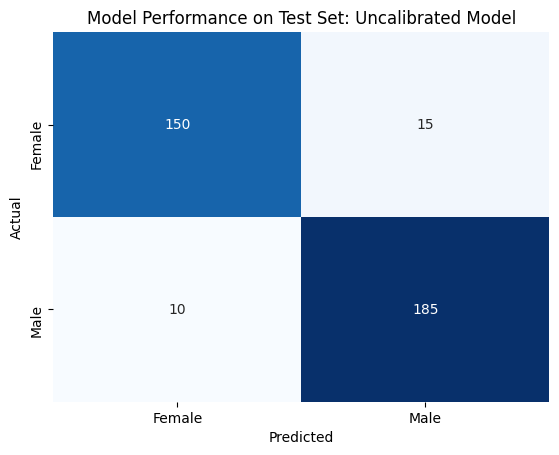

In [19]:
# predict on the test set
y_pred_test = pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues', cbar=False)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Model Performance on Test Set: Uncalibrated Model')
ax.set_xticklabels(['Female', 'Male'])
ax.set_yticklabels(['Female', 'Male'])
plt.show()

In [20]:
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV

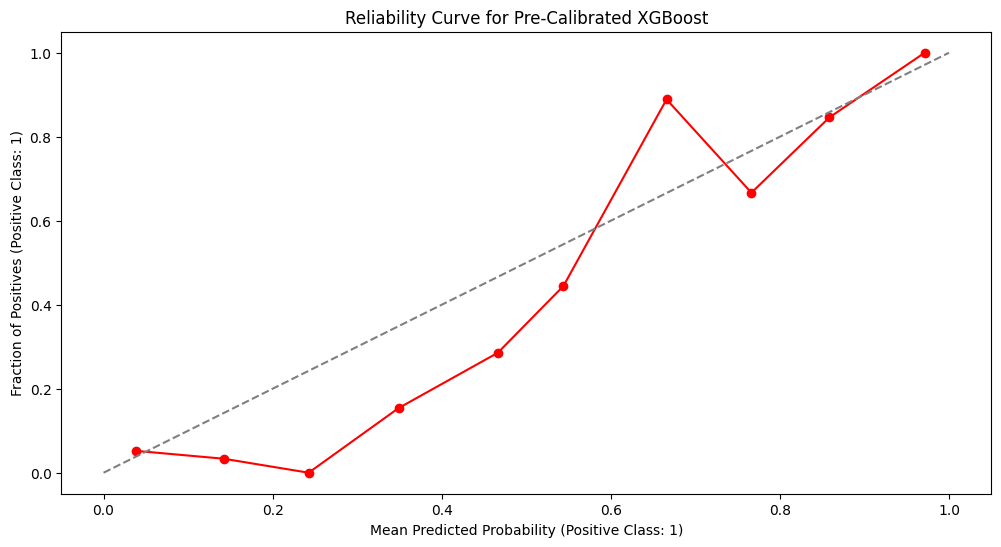

In [21]:
# Predict probabilities on the test set
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Plot Reliability Curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)

plt.figure(figsize=(12,6))
plt.plot(prob_pred, prob_true, marker='o', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Mean Predicted Probability (Positive Class: 1)')
plt.ylabel('Fraction of Positives (Positive Class: 1)')
plt.title('Reliability Curve for Pre-Calibrated XGBoost')
plt.show()

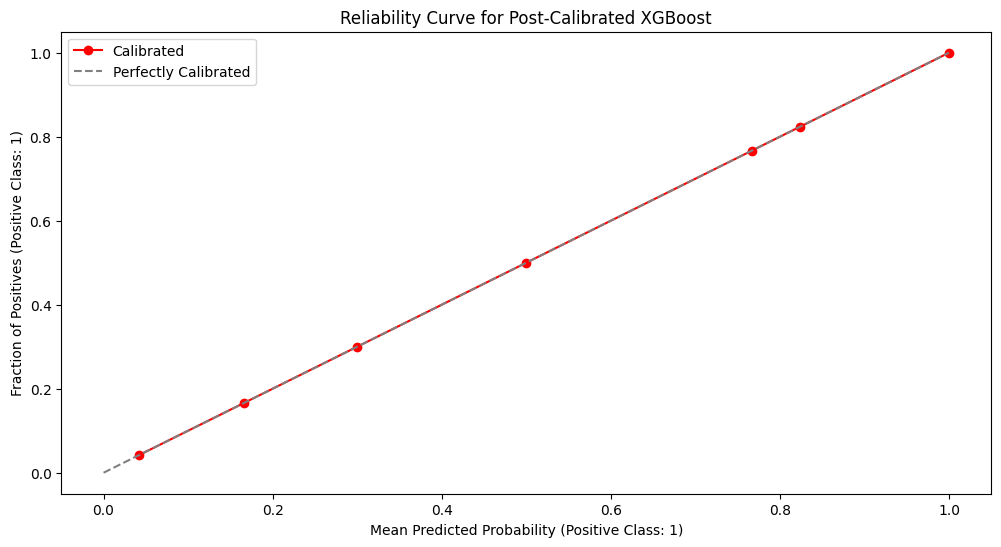

In [22]:
# Calibrate the classifier using sigmoid method
calibrated_clf = CalibratedClassifierCV(estimator=pipeline, cv='prefit', method='isotonic')

calibrated_clf.fit(X_test, y_test)

# Predict probabilities on the test set
y_pred_proba = calibrated_clf.predict_proba(X_test)[:, 1]

# Compute calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)

# Plot the calibration curve
plt.figure(figsize=(12,6))
plt.plot(prob_pred, prob_true, marker='o', color='red', label='Calibrated')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability (Positive Class: 1)')
plt.ylabel('Fraction of Positives (Positive Class: 1)')
plt.title('Reliability Curve for Post-Calibrated XGBoost')
plt.legend(loc='best')
plt.show()

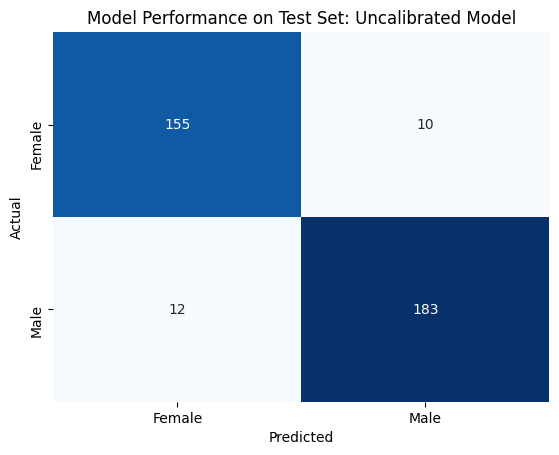

In [23]:
# predict on the test set
y_pred_test = calibrated_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues', cbar=False)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Model Performance on Test Set: Uncalibrated Model')
ax.set_xticklabels(['Female', 'Male'])
ax.set_yticklabels(['Female', 'Male'])
plt.show()

## **Global Explanation: Feature Importance**

In [24]:
# Access the coefficients from the classifier
classifier = pipeline.named_steps['classifier']
vectorizer = pipeline.named_steps['vectorizer']

# Check if the classifier has coefficients
if hasattr(classifier, 'coef_'):
    coefficients = classifier.coef_.flatten()  # Flatten in case of multiclass (or use `coef_[0]` for binary)
    transformed_feature_names = vectorizer.get_feature_names_out()
    
    # Ensure that the coefficients and feature names match in length
    if len(coefficients) == len(transformed_feature_names):
        # Create a DataFrame with the feature importance
        feature_importance = pd.DataFrame({
            'Feature': transformed_feature_names,
            'Importance': coefficients
        })

        # Sort by absolute importance
        feature_importance['Absolute_Importance'] = feature_importance['Importance'].abs()
        feature_importance = feature_importance.sort_values(by='Absolute_Importance', ascending=False)

        # Drop 'Absolute_Importance'
        feature_importance.drop(columns=['Absolute_Importance'], inplace=True)

        # Display feature importance
        display(feature_importance.head(10))
    else:
        print("Error: The number of coefficients does not match the number of features.")
else:
    print("Error: The classifier does not have a `coef_` attribute.")

Feature  Importance
231      ah    -2.201327
1823     ti    -2.152116
629      em    -1.894679
1335     ni    -1.692877
301      an     1.691594
875      ia    -1.596973
374      ati   -1.557146
1843     to     1.555989
1709     sih   -1.464263
380      atu   -1.462700

In [25]:
# Filter out rows where the 'Feature' column has single-character strings
# Replace spaces with $ in the 'Feature' column
feature_importance2 = feature_importance.copy()
feature_importance2['Feature'] = feature_importance2['Feature'].str.replace(' ', '_')
feature_importance2 = feature_importance2.head(20)
feature_importance2 = feature_importance2.sort_values(by='Importance')
feature_importance2

Feature  Importance
231      ah_   -2.201327
1823     ti_   -2.152116
629      em_   -1.894679
1335     ni_   -1.692877
875      ia_   -1.596973
374      ati   -1.557146
1709     sih   -1.464263
380      atu   -1.462700
1249     mi_   -1.439306
307      ani   -1.337004
1138     la_   -1.298195
964      ini   -1.235769
1862     tun   -1.150908
109      _m_    1.149581
272      al_    1.191577
1361     no_    1.403186
504      dan    1.411111
528      di_    1.431086
1843     to_    1.555989
301      an_    1.691594

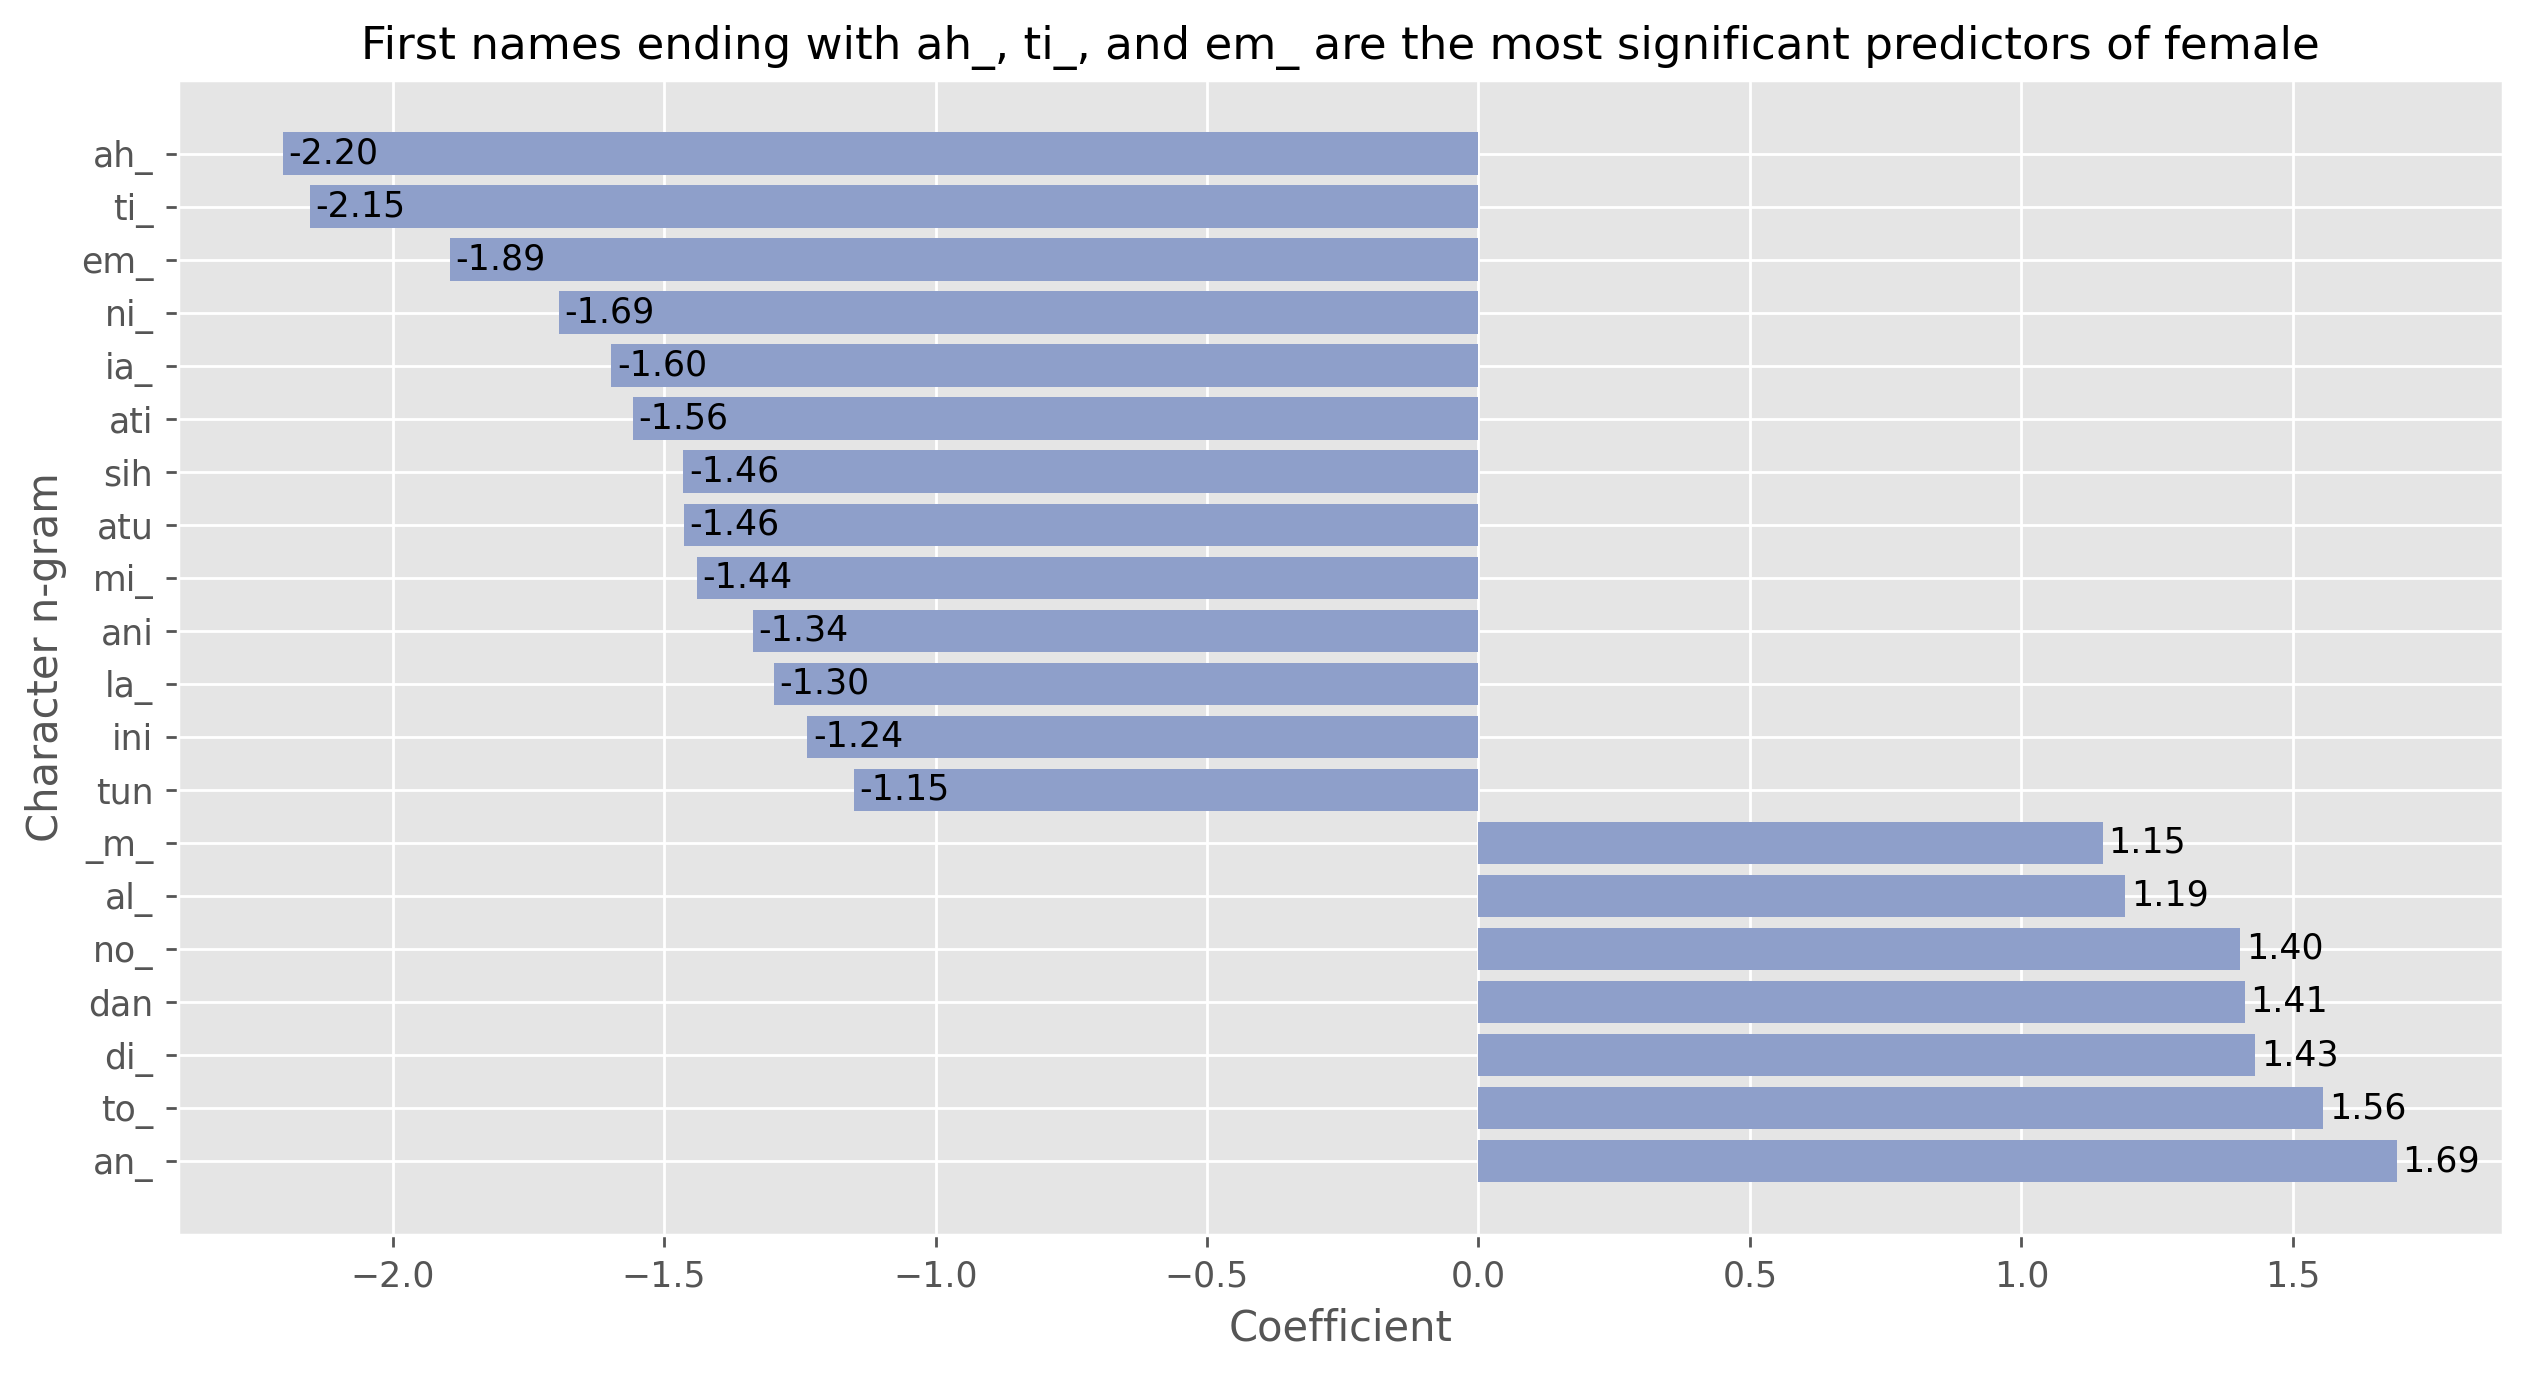

In [26]:
# visualize feature importance
plt.style.use('ggplot')
plt.figure(figsize=(12, 6), dpi=250)
bars = plt.barh(feature_importance2['Feature'], feature_importance2['Importance'], color='#8e9fca')

# add data labels 
for bar in bars:
    plt.text(
        bar.get_width() + 0.01,                 # position slightly to the right of the bar end
        bar.get_y() + bar.get_height() / 2,     # vertical position at the center of the bar
        f'{bar.get_width():.2f}',               # format the coefficient value to 2 decimal places
        va='center',                            # vertical alignment
        ha='left',                              # horizontal alignment
        fontsize=10,                            
        color='black'                           
    )

plt.xlabel('Coefficient')
plt.title('First names ending with ah_, ti_, and em_ are the most significant predictors of female', size=13)
plt.ylabel('Character n-gram')
plt.gca().invert_yaxis()                        # show the highest coefficients at the top
plt.show()

In [27]:
df_seen = pd.DataFrame({'name':X_train, 'gender':y_train})
df_seen['gender'] = df_seen['gender'].apply(lambda x: 'm' if x == 1 else 'f')
df_seen.head()

name gender
1891        siti arbaiyah      f
1695          j supartono      m
1787       jarwo pratitis      m
176   reysa hastarimasuci      f
1206       alwan supangat      m

In [28]:
df_seen[(df_seen['name'].str.contains(r'^\w+ah\s', regex=True)) & (df_seen['gender'] == 'f')]

name gender
598            indah kurnia sari      f
1731            diah ayu safitri      f
823               aisyah giovani      f
126              indah rahmawati      f
41               zakiah nurviani      f
94            indah permata sari      f
1835              afifah mariani      f
1687               indah mawarni      f
660   azzah rotun nisa almufidah      f
1001            indah bunga hati      f
1284               fadhilah aini      f
1782         hasnah elfina warda      f
1309               atiah azzaroh      f
758                endah susanti      f
1809           kamilah mubarokah      f
1560             indah fatmawati      f

In [29]:
df_seen[(df_seen['name'].str.contains(r'^\w+ah\s', regex=True)) & (df_seen['gender'] == 'm')]

name gender
1243          lamsyah purba      m
957   abdullah afif azzuhri      m
412     aissyah dwi zhaskia      m
125        hijrah syahputra      m
22       ibnuyohanzah ahmad      m

## **Local Explanation**

In [30]:
# Make predictions on the test set
y_pred = calibrated_clf.predict(X_test)

# Get the predicted probabilities for each class
y_prob = calibrated_clf.predict_proba(X_test)

# Combine the predictions and probabilities into a DataFrame
predictions_df = pd.DataFrame({
    'Name': X_test,
    'Actual': y_test,
    'Predicted': y_pred,
    'ProbM': y_prob[:, 1],  # Probability of 'Male'
    'ProbF': y_prob[:, 0],  # Probability of 'Female'
}).round(2)

predictions_df['FN'] = (predictions_df['Actual'] == 1) & (predictions_df['Predicted'] == 0)
predictions_df['FP'] = (predictions_df['Actual'] == 0) & (predictions_df['Predicted'] == 1)

predictions_df.head()

Name  Actual  Predicted  ProbM  ProbF     FN     FP
1351     wahyu redyansyah       1          1   0.77   0.23  False  False
221   yunaldi rizki putra       1          1   1.00   0.00  False  False
1653     thamrin simamora       1          1   1.00   0.00  False  False
441               samiyah       0          0   0.06   0.94  False  False
1386     suci ayu mawarni       0          0   0.02   0.98  False  False

In [31]:
mispredictions = predictions_df[predictions_df['Actual'] != predictions_df['Predicted']]
mispredictions_cnt = len(mispredictions)
misprediction_rate = len(mispredictions)/len(predictions_df)*100
type1_errors = mispredictions[mispredictions['FP'] == True]
type2_errors = mispredictions[mispredictions['FN'] == True]
print(f'Misprediction in total: {mispredictions_cnt} (or {misprediction_rate:.2f}%)')
print(f'Total false positives: {len(type1_errors)}')
print(f'Total false negatives: {len(type2_errors)}')

Misprediction in total: 22 (or 6.11%)
Total false positives: 10
Total false negatives: 12


In [32]:
from lime.lime_text import LimeTextExplainer

# Initialize LIME text explainer
explainer = LimeTextExplainer(class_names=['Female', 'Male'])

# Ensure text_instance is a single string
text_instance = predictions_df['Name'].iloc[77]
print(f'Gender to predict: {text_instance}')        # Check the content

# Ensure the classifier function is correct
def predict_proba_fn(texts):
    return calibrated_clf.predict_proba(texts)

# Explain the instance
exp = explainer.explain_instance(text_instance, 
                                 predict_proba_fn, 
                                 num_features=50)

# Display the explanation
exp.show_in_notebook(text=True)

Gender to predict: muhammad azmy


___

https://www.kaggle.com/datasets/dionisiusdh/indonesian-names

In [93]:
from  sklearn.metrics import precision_recall_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ptitprince as pt
from scipy.stats import mannwhitneyu
pd.options.display.max_colwidth = 50
plt.style.use('ggplot')

import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score, roc_auc_score

## **1 Introduction**

## **2 Data Preparation and Exploration**
### **2.1 Data Preparation**

In [95]:
# load the dataset
df = pd.read_csv('../data/indonesian-names.csv')
print(f'The dataframe contains {df.shape[0]} rows and {df.shape[1]} cols.')
print(f"- {len(df.select_dtypes(include='number').columns)} are numeric cols")
print(f"- {len(df.select_dtypes(include='O').columns)} are object cols")
df.sample(n=10, random_state=42)

The dataframe contains 1960 rows and 2 cols.
- 0 are numeric cols
- 2 are object cols


name gender
1096  ahmad hasinul fikqih      m
572        siti nur azijah      f
450                 sumini      f
383                 sumono      m
1489                 ruhdi      m
1402               kadirin      m
128     indri dian pertiwi      m
1475               suyanto      m
824      arif nova baihaqi      m
239         muhammad ilham      m

In [133]:
# check missing values
df.isna().mean()*100

name      0.0
gender    0.0
dtype: float64

In [141]:
# check duplicates
duplicates = df.duplicated().sum()
duplicate_rate = round(df.duplicated().sum()/len(df)*100, 2)
print(f'Total duplicates: {duplicates} ({duplicate_rate} of sample size)')
df[df.duplicated(keep=False)].sort_values(by='name').head(10)

Total duplicates: 164 (8.37 of sample size)


name gender
1020  ahmad hasinul fikqih      m
1096  ahmad hasinul fikqih      m
1140        ahmad priyanto      m
1064        ahmad priyanto      m
1120            ahmad tona      m
1044            ahmad tona      m
1101  aila annafi'an zaini      f
1025  aila annafi'an zaini      f
1138           andi sofyan      m
1062           andi sofyan      m

In [142]:
# drop duplicates
df.drop_duplicates(keep='first', inplace=True)

In [143]:
# double check duplicates
df.duplicated().sum()

0

In [144]:
gender_df = pd.DataFrame({'gender': (df['gender'].value_counts(normalize=True)*100).index,
              'rate':(df['gender'].value_counts(normalize=True)*100).values}).round(2)
gender_df

gender   rate
0      m  55.79
1      f  44.21

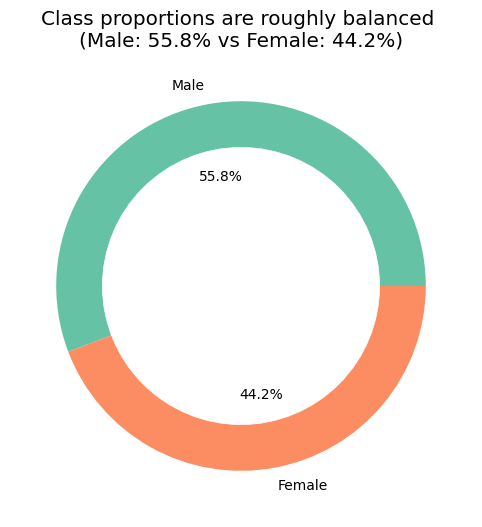

In [180]:
fig, ax = plt.subplots(figsize=(10, 6))
circle_center = plt.Circle( (0, 0), 0.75, color='white')
plt.pie(gender_df['rate'], labels=['Male', 'Female'], 
        autopct='%1.1f%%', startangle=0, 
        colors=['#66c2a5', '#fc8d62'])
p = plt.gcf()
p.gca().add_artist(circle_center)
plt.title('Class proportions are roughly balanced \n(Male: 55.8% vs Female: 44.2%)')
plt.show()
plt.show()

In [151]:
# check punctuation marks
df[df['name'].str.contains(r'[^\w\s]', regex=True)].head()

name gender
20         habil sabilla do'a      f
96                  m. muawam      m
97   m. yassir saputra jamina      m
287             nu' in sofyan      m
298    m. charly iman nugroho      m

In [164]:
# remove punctuation marks
explore_df = df.copy()
explore_df['name'] = explore_df['name'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))

# check if still any punctuation marks
explore_df[explore_df['name'].str.contains(r'[^\w\s]', regex=True)].head()

Empty DataFrame
Columns: [name, gender]
Index: []

In [165]:
explore_df['wordcount'] = explore_df['name'].str.split().str.len()
explore_df['charcount'] = explore_df['name'].apply(lambda x: len(x))
explore_df.head()

name gender  wordcount  charcount
0              hafizhan shidqi      m          2         15
1                gandhi wibowo      m          2         13
2  aldio mahendra purwandrarto      m          3         27
3                  benny putra      m          2         11
4         vicky vernando dasta      m          3         20

In [166]:
# function to count vowels and consonants
def count_vowels_consonants(name):
    vowels = 'aeiou'
    consonants = 'bcdfghjklmnpqrstvwxyz'
    num_vowels = sum(name.count(vowel) for vowel in vowels)
    num_consonants = sum(name.count(consonant) for consonant in consonants)
    
    return num_vowels, num_consonants

# apply function
explore_df['vowelcount'], explore_df['conscount'] = zip(*explore_df['name'].apply(count_vowels_consonants))

# display the DataFrame
explore_df.head()


name gender  wordcount  charcount  vowelcount  \
0              hafizhan shidqi      m          2         15           5   
1                gandhi wibowo      m          2         13           5   
2  aldio mahendra purwandrarto      m          3         27          10   
3                  benny putra      m          2         11           3   
4         vicky vernando dasta      m          3         20           6   

   conscount  
0          9  
1          7  
2         15  
3          7  
4         12

### **2.2 Data Analysis**
#### **2.2.1 Do numerical features follow normal distributions?**

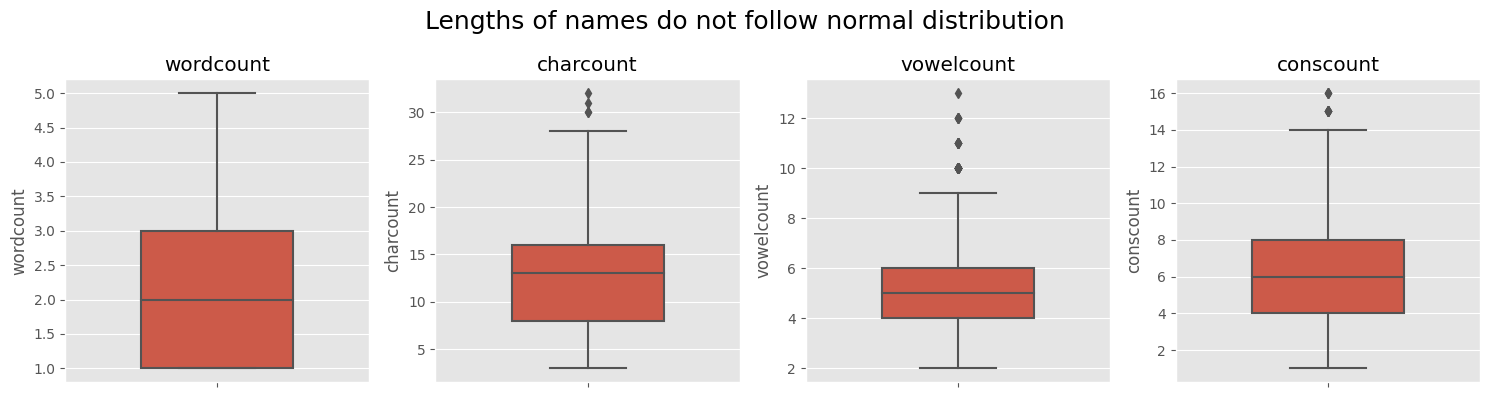

In [189]:
# specify columns to plot
numerical_columns = explore_df.select_dtypes(include='number')

# setup up figure size
plt.figure(figsize=(15, 4))

# create boxplots
for i, col in enumerate(numerical_columns):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=explore_df[col], width=0.5)
    plt.title(f'{col}')
plt.suptitle('Lengths of names do not follow normal distribution', size=18)
plt.tight_layout()
plt.show()

#### **2.2 Is there any significant difference between male and female in terms of word counts?**

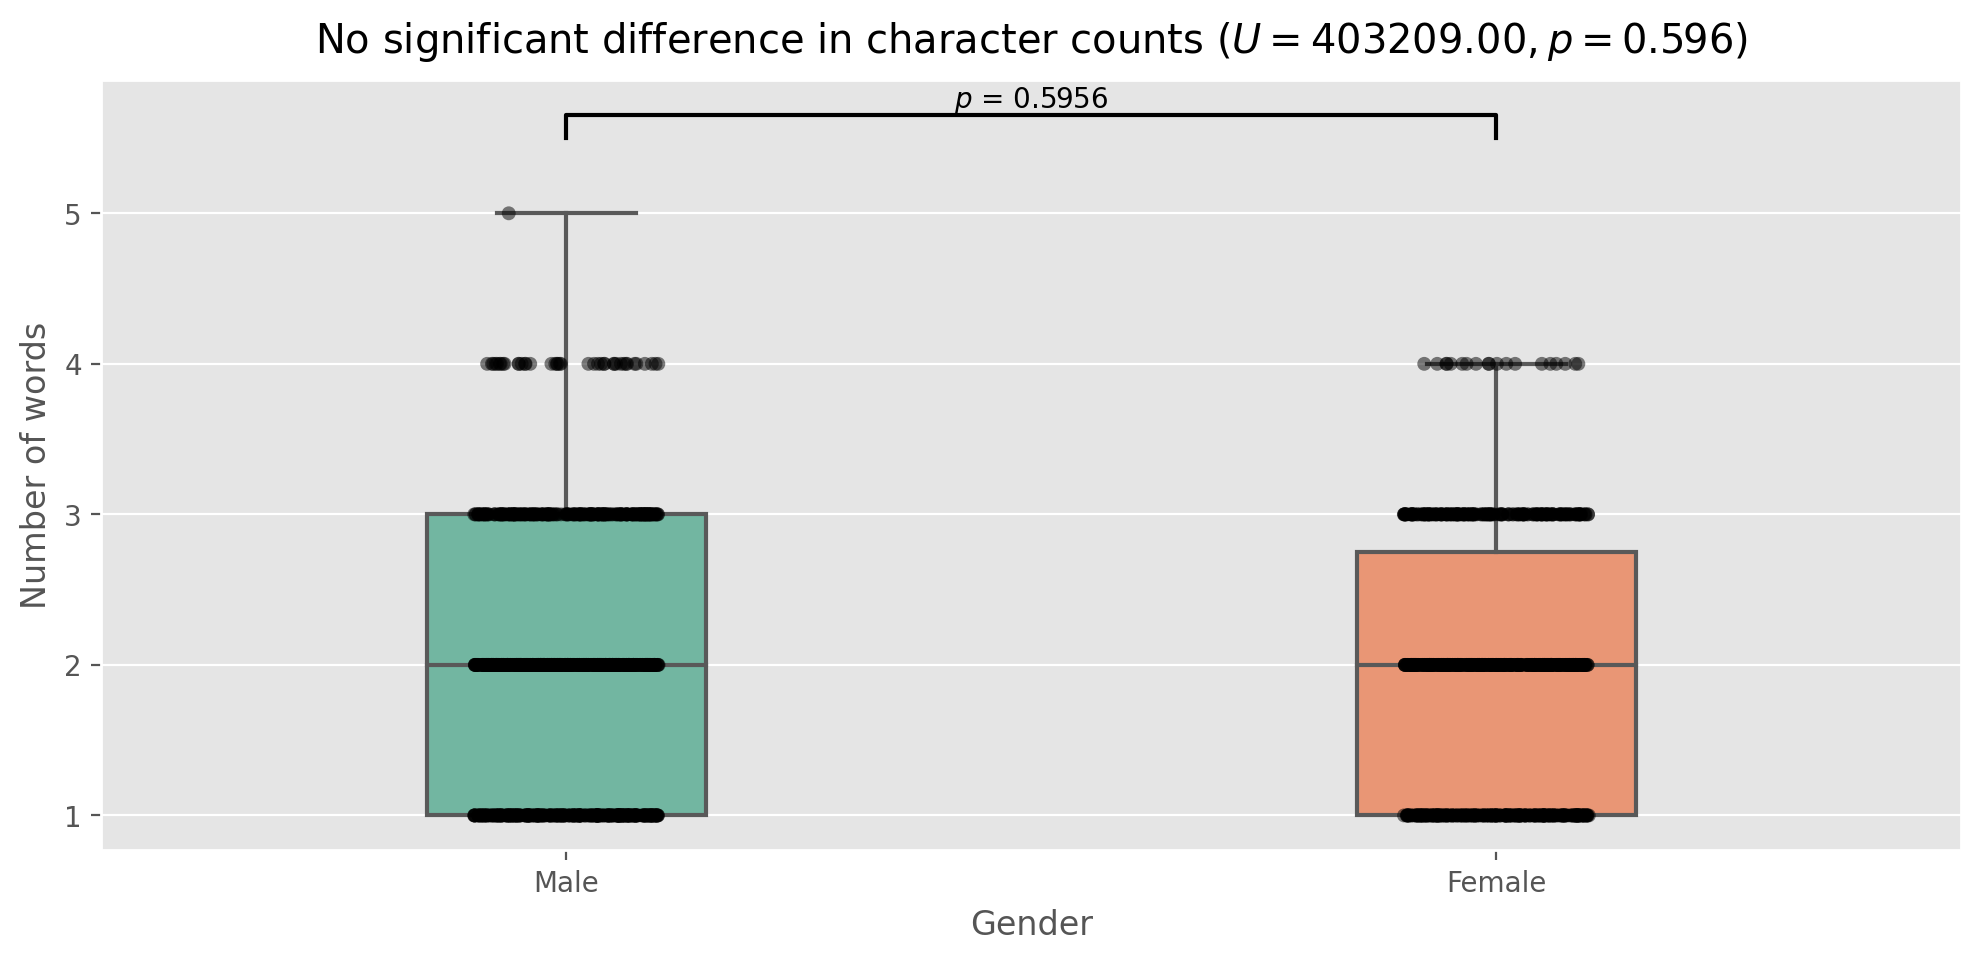

In [228]:
# Prepare data
gender_types = explore_df['gender'].unique()
data_group1 = explore_df[explore_df['gender'] == gender_types[0]]['wordcount']
data_group2 = explore_df[explore_df['gender'] == gender_types[1]]['wordcount']

# Perform Mann-Whitney U Test
stat, p_value = mannwhitneyu(data_group1, data_group2)

# Visualize the difference
plt.figure(figsize=(12, 5), dpi=200)
sns.boxplot(x='gender', y='wordcount', data=explore_df, palette='Set2', width=0.3)
sns.stripplot(x='gender', y='wordcount', data=explore_df, color='k', alpha=0.5, jitter=True)

# Calculate the vertical offset for annotations
max_y = max(explore_df['wordcount'])
offset = max_y * 0.1  # 10% of the y-axis range as an offset

# Determine positions for the bracket
x1, x2 = 0, 1
y = max_y + offset  # Vertical position of the bracket
h = offset * 0.3    # Height of the bracket
col = 'k'           # Color of the line and text

# Add a bracket-style line
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col)
plt.text((x1 + x2) * 0.5, y + h, f'$p$ = {p_value:.4f}', ha='center', va='bottom', color=col)

plt.title(f'No significant difference in character counts ($U={stat:.2f}, p={p_value:.3f}$)', pad=10)
plt.xlabel('Gender')
plt.ylabel('Number of words')
current_labels = plt.gca().get_xticklabels()    # Get current y-tick labels
plt.gca().set_xticklabels(['Male', 'Female'])   # Replace with new labels

plt.show()

In [229]:
# Compute effect size (Rank-Biserial Correlation)
n1 = len(data_group1)
n2 = len(data_group2)
r = (2 * stat - n1 * n2) / (n1 * n2)
r = round(r, 4)  # rounding for clarity

# Output results
print(f'Mann-Whitney U statistic: {stat:.2f}')
print(f'p-value: {p_value:.3f}')
print(f'Rank-Biserial Correlation Coefficient (r): {r:.4f}')

Mann-Whitney U statistic: 403209.00
p-value: 0.596
Rank-Biserial Correlation Coefficient (r): 0.0136


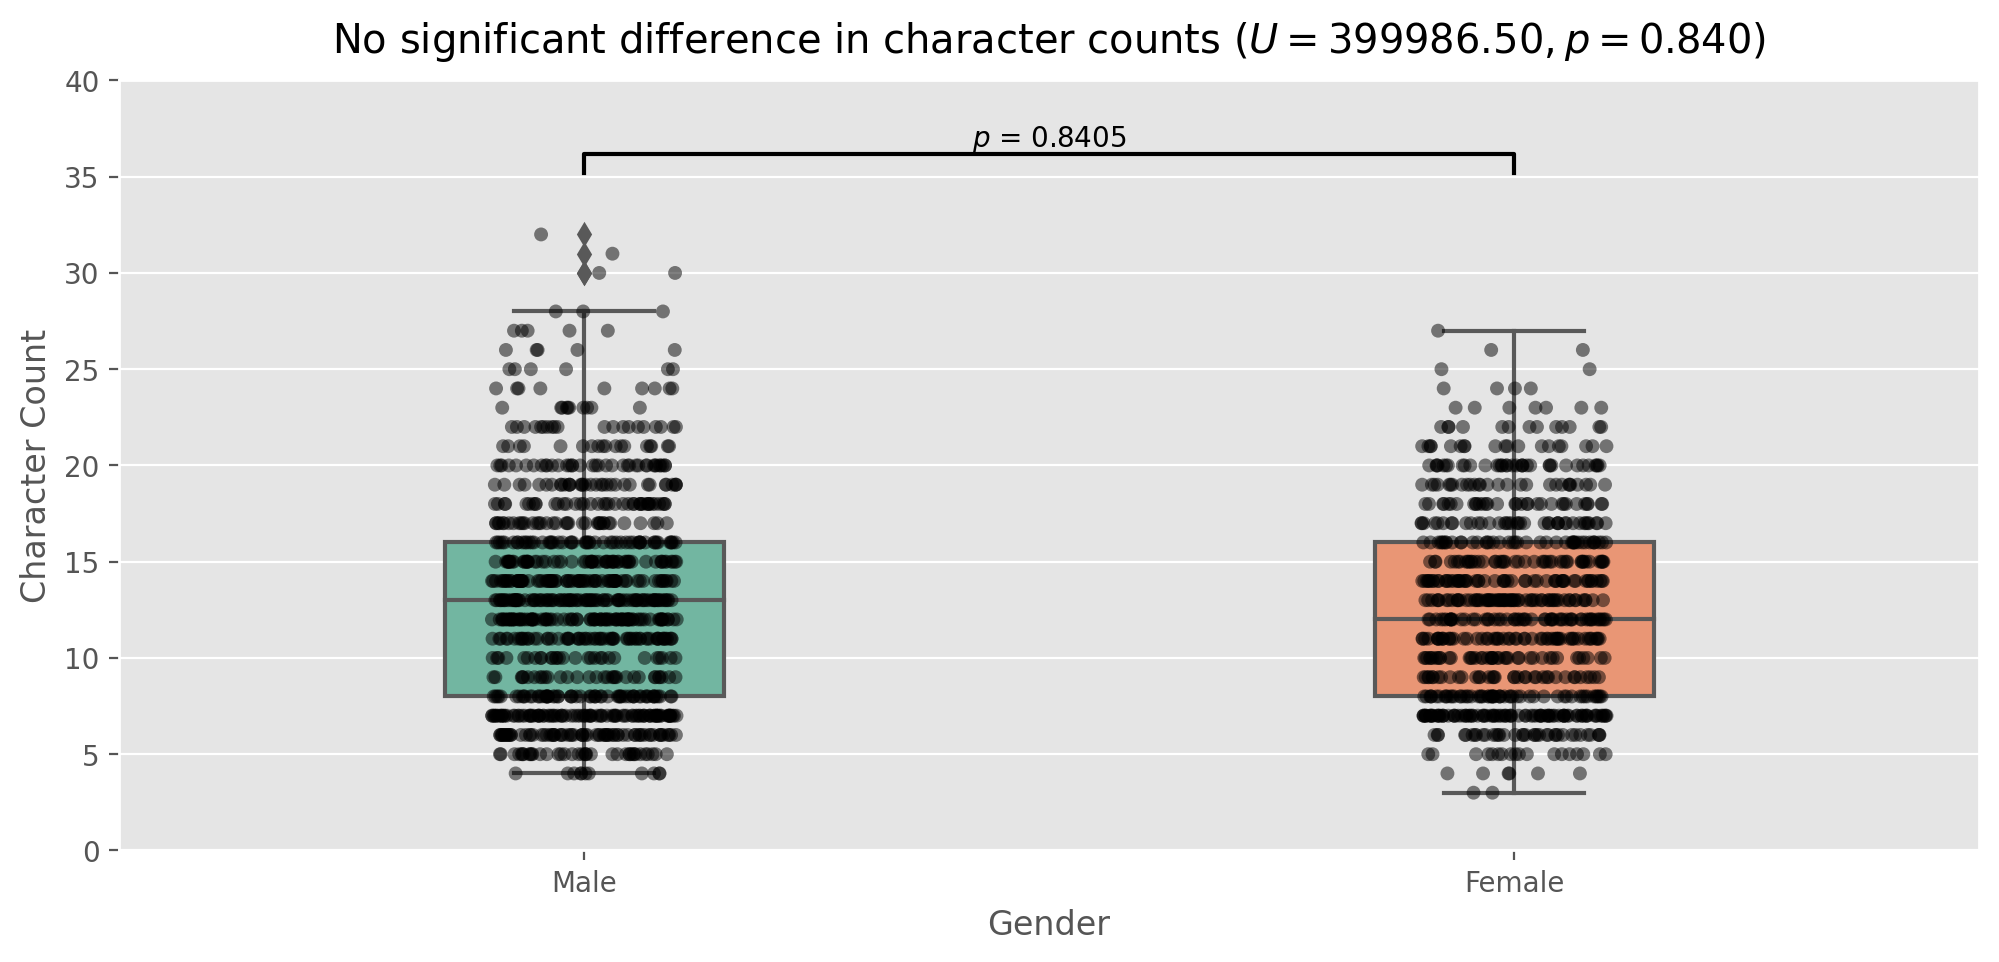

In [230]:
# Prepare data
gender_types = explore_df['gender'].unique()
data_group1 = explore_df[explore_df['gender'] == gender_types[0]]['charcount']
data_group2 = explore_df[explore_df['gender'] == gender_types[1]]['charcount']

# Perform Mann-Whitney U Test
stat, p_value = mannwhitneyu(data_group1, data_group2)

# Visualize the difference
plt.figure(figsize=(12, 5), dpi=200)
sns.boxplot(x='gender', y='charcount', data=explore_df, palette='Set2', width=0.3)
sns.stripplot(x='gender', y='charcount', data=explore_df, color='k', alpha=0.5, jitter=True)

# Calculate the vertical offset for annotations
max_y = max(explore_df['charcount'])
offset = max_y * 0.1  # 10% of the y-axis range as an offset

# Determine positions for the bracket
x1, x2 = 0, 1
y = max_y + offset  # Vertical position of the bracket
h = offset * 0.3    # Height of the bracket
col = 'k'           # Color of the line and text

# Add a bracket-style line
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col)
plt.text((x1 + x2) * 0.5, y + h, f'$p$ = {p_value:.4f}', ha='center', va='bottom', color=col)

plt.title(f'No significant difference in character counts ($U={stat:.2f}, p={p_value:.3f}$)', pad=10)
plt.xlabel('Gender')
plt.ylabel('Character Count')
current_labels = plt.gca().get_xticklabels()    # Get current y-tick labels
plt.gca().set_xticklabels(['Male', 'Female'])   # Replace with new labels
plt.ylim(0, 40)
plt.show()

#### **2.3 Do males and females have significant differences in the number of vowels?**

In [231]:
# Compute effect size (Rank-Biserial Correlation)
n1 = len(data_group1)
n2 = len(data_group2)
r = (2 * stat - n1 * n2) / (n1 * n2)
r = round(r, 4)  # rounding for clarity

# Output results
print(f'Mann-Whitney U statistic: {stat:.2f}')
print(f'p-value: {p_value:.3f}')
print(f'Rank-Biserial Correlation Coefficient (r): {r:.4f}')

Mann-Whitney U statistic: 399986.50
p-value: 0.840
Rank-Biserial Correlation Coefficient (r): 0.0055


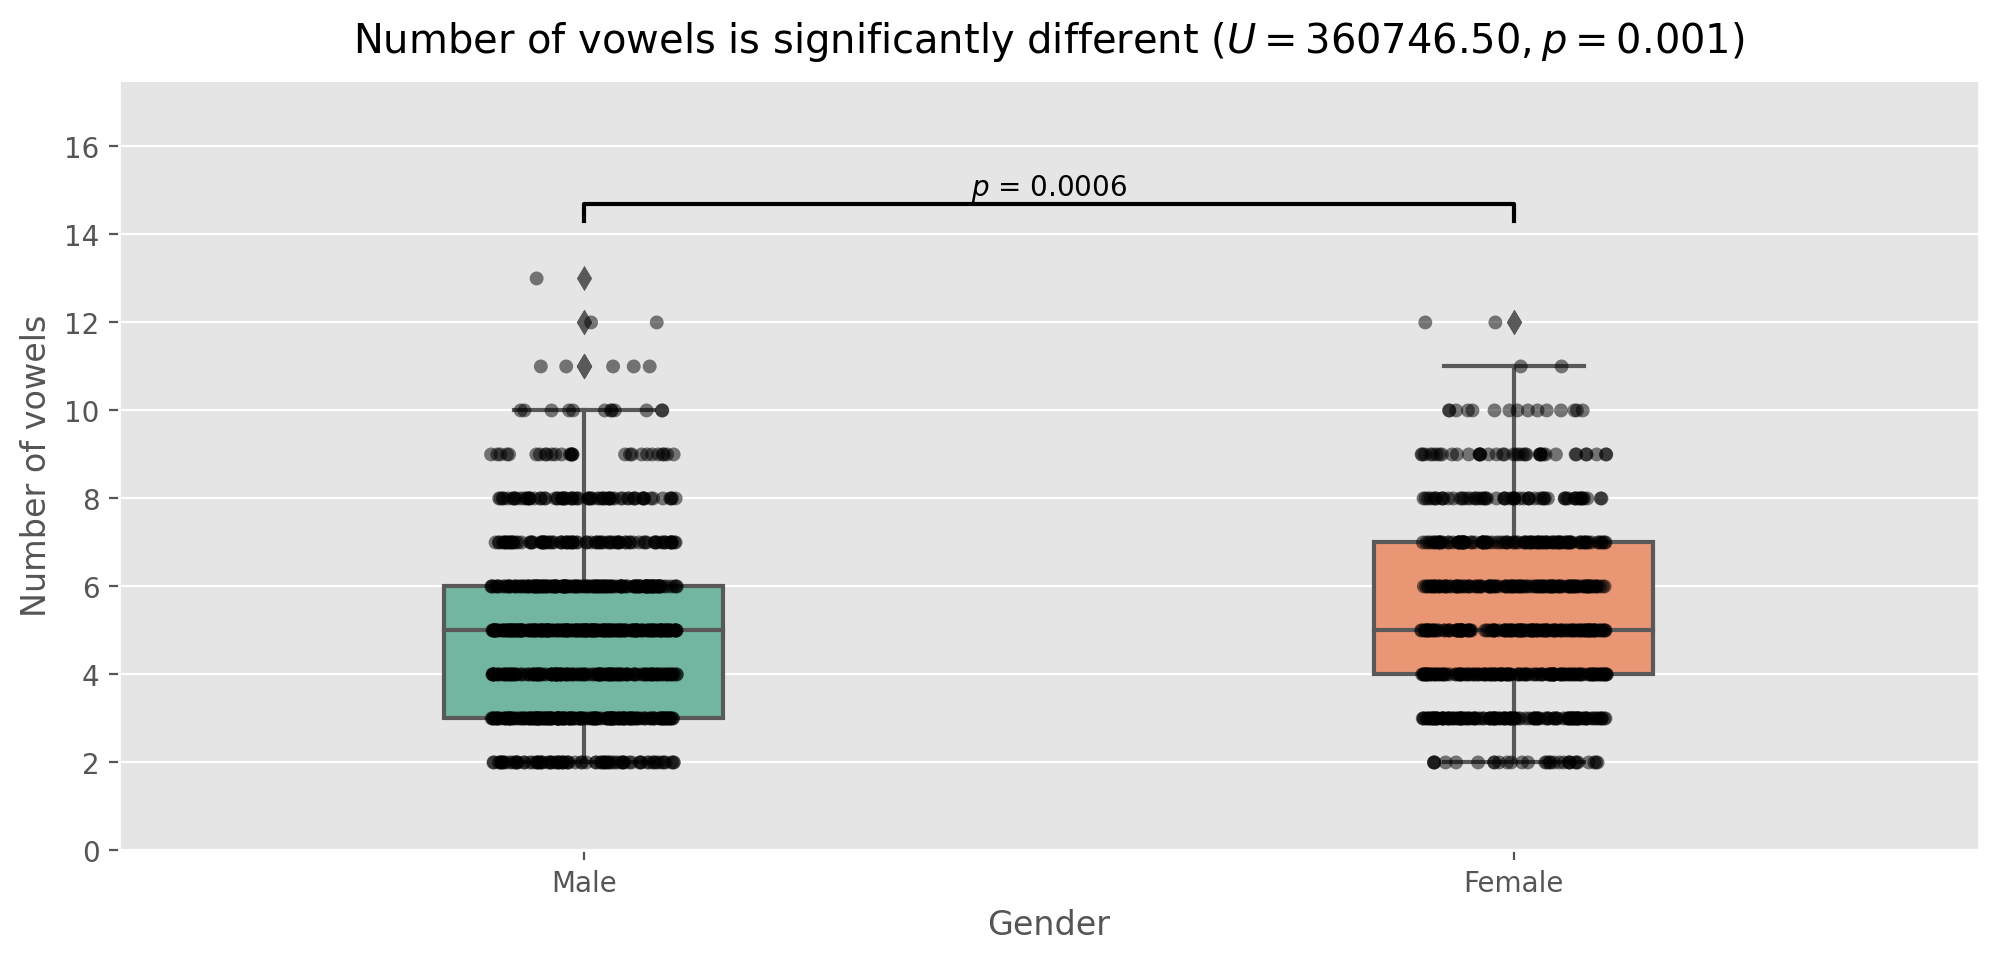

In [232]:
# Prepare data
gender_types = explore_df['gender'].unique()
data_group1 = explore_df[explore_df['gender'] == gender_types[0]]['vowelcount']
data_group2 = explore_df[explore_df['gender'] == gender_types[1]]['vowelcount']

# Perform Mann-Whitney U Test
stat, p_value = mannwhitneyu(data_group1, data_group2)

# Visualize the difference
plt.figure(figsize=(12, 5), dpi=200)
sns.boxplot(x='gender', y='vowelcount', data=explore_df, palette='Set2', width=0.3)
sns.stripplot(x='gender', y='vowelcount', data=explore_df, color='k', alpha=0.5, jitter=True)

# Calculate the vertical offset for annotations
max_y = max(explore_df['vowelcount'])
offset = max_y * 0.1  # 10% of the y-axis range as an offset

# Determine positions for the bracket
x1, x2 = 0, 1
y = max_y + offset  # Vertical position of the bracket
h = offset * 0.3    # Height of the bracket
col = 'k'           # Color of the line and text

# Add a bracket-style line
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col)
plt.text((x1 + x2) * 0.5, y + h, f'$p$ = {p_value:.4f}', ha='center', va='bottom', color=col)

plt.title(f'Number of vowels is significantly different ($U={stat:.2f}, p={p_value:.3f}$)', pad=10)
plt.xlabel('Gender')
plt.ylabel('Number of vowels')
current_labels = plt.gca().get_xticklabels()    # Get current y-tick labels
plt.gca().set_xticklabels(['Male', 'Female'])   # Replace with new labels
plt.ylim(0, 17.5)
plt.show()

#### **2.4 Is the number of consonants across gender significantly different?**

In [233]:
# Compute effect size (Rank-Biserial Correlation)
n1 = len(data_group1)
n2 = len(data_group2)
r = (2 * stat - n1 * n2) / (n1 * n2)
r = round(r, 4)  # rounding for clarity

# Output results
print(f'Mann-Whitney U statistic: {stat:.2f}')
print(f'p-value: {p_value:.3f}')
print(f'Rank-Biserial Correlation Coefficient (r): {r:.4f}')

Mann-Whitney U statistic: 360746.50
p-value: 0.001
Rank-Biserial Correlation Coefficient (r): -0.0931


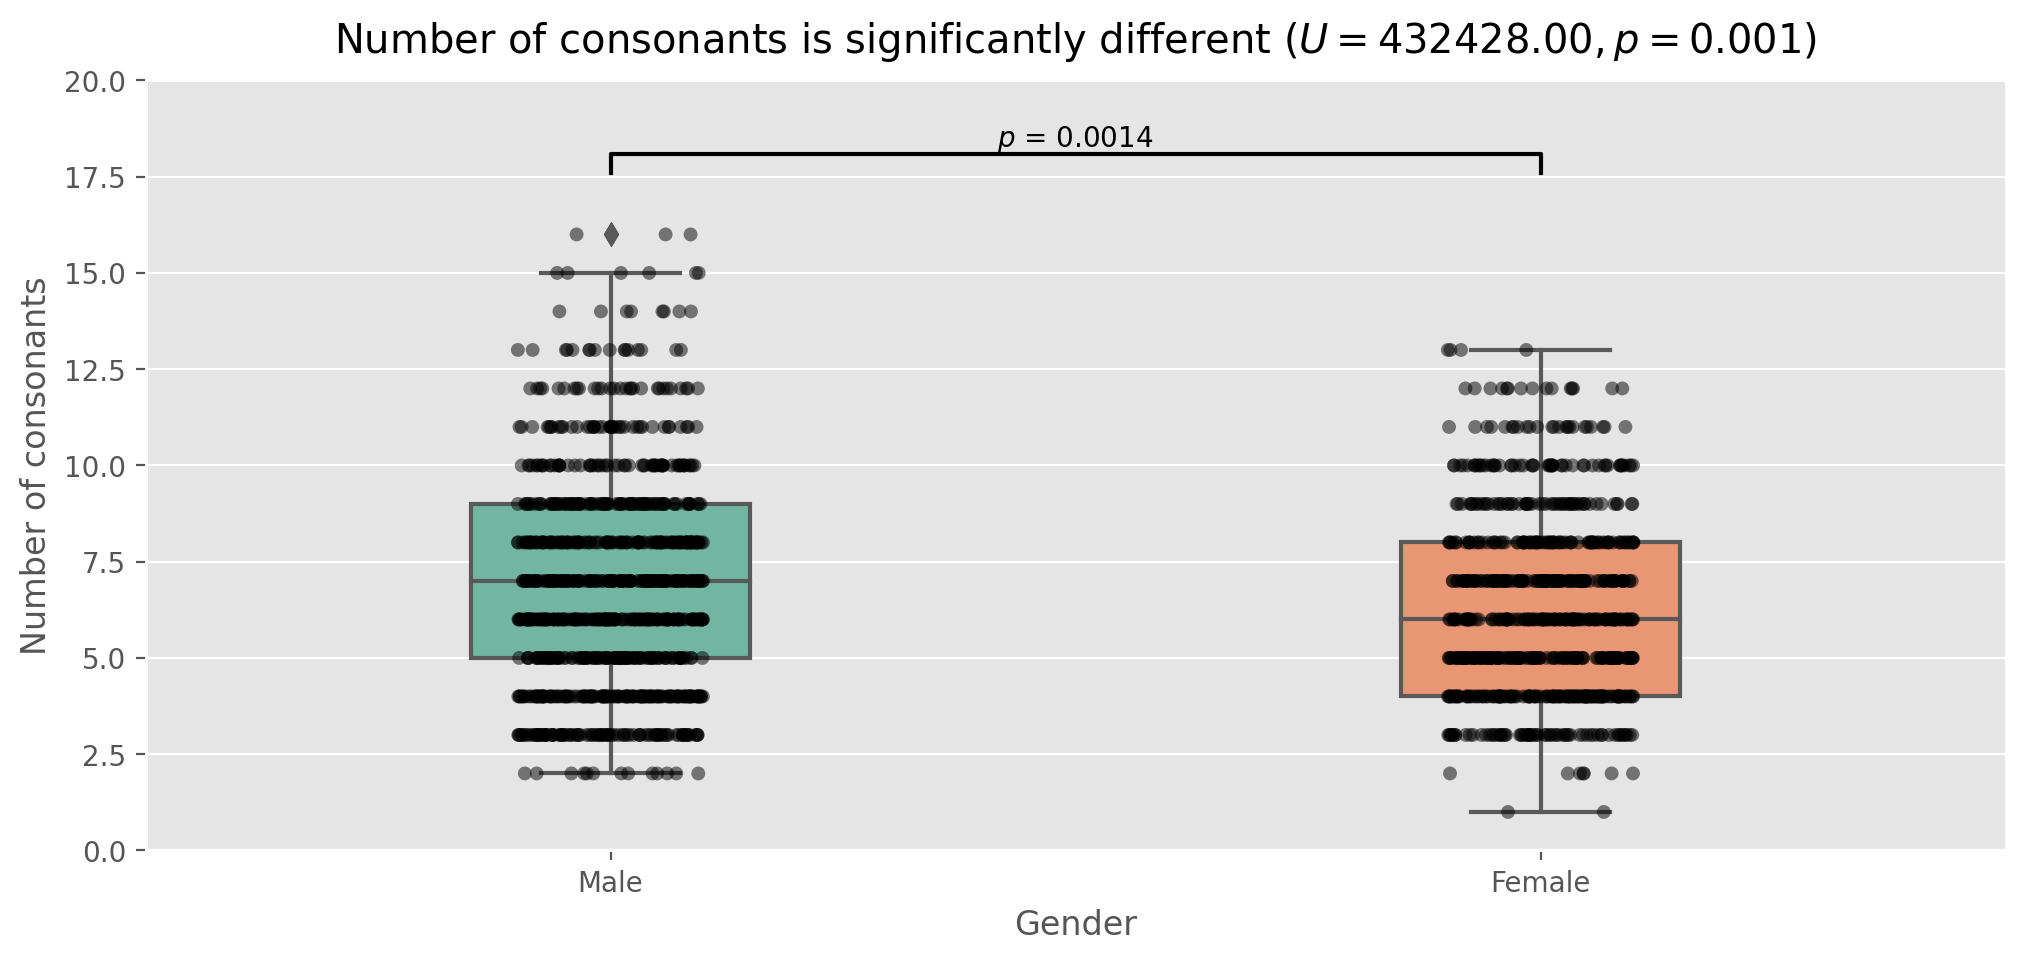

In [234]:
# Prepare data
gender_types = explore_df['gender'].unique()
data_group1 = explore_df[explore_df['gender'] == gender_types[0]]['conscount']
data_group2 = explore_df[explore_df['gender'] == gender_types[1]]['conscount']

# Perform Mann-Whitney U Test
stat, p_value = mannwhitneyu(data_group1, data_group2)

# Visualize the difference
plt.figure(figsize=(12, 5), dpi=200)
sns.boxplot(x='gender', y='conscount', data=explore_df, palette='Set2', width=0.3)
sns.stripplot(x='gender', y='conscount', data=explore_df, color='k', alpha=0.5, jitter=True)

# Calculate the vertical offset for annotations
max_y = max(explore_df['conscount'])
offset = max_y * 0.1  # 10% of the y-axis range as an offset

# Determine positions for the bracket
x1, x2 = 0, 1
y = max_y + offset  # Vertical position of the bracket
h = offset * 0.3    # Height of the bracket
col = 'k'           # Color of the line and text

# Add a bracket-style line
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col)
plt.text((x1 + x2) * 0.5, y + h, f'$p$ = {p_value:.4f}', ha='center', va='bottom', color=col)

plt.title(f'Number of consonants is significantly different ($U={stat:.2f}, p={p_value:.3f}$)', pad=10)
plt.xlabel('Gender')
plt.ylabel('Number of consonants')
current_labels = plt.gca().get_xticklabels()    # Get current y-tick labels
plt.gca().set_xticklabels(['Male', 'Female'])   # Replace with new labels
plt.ylim(0, 20)
plt.show()

In [235]:
# Compute effect size (Rank-Biserial Correlation)
n1 = len(data_group1)
n2 = len(data_group2)
r = (2 * stat - n1 * n2) / (n1 * n2)
r = round(r, 4)  # rounding for clarity

# Output results
print(f'Mann-Whitney U statistic: {stat:.2f}')
print(f'p-value: {p_value:.3f}')
print(f'Rank-Biserial Correlation Coefficient (r): {r:.4f}')

Mann-Whitney U statistic: 432428.00
p-value: 0.001
Rank-Biserial Correlation Coefficient (r): 0.0871


## **3 Predictive Modeling**

In [152]:
# remove punctuations
class RemovePunctuation(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if isinstance(X, pd.Series):
            return X.apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
        elif isinstance(X, list):
            return pd.Series(X).apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
        else:
            raise ValueError("Input should be a series or list of strings.")

In [33]:
X = df['name']
y = df['gender'].apply(lambda x: 1 if x == 'm' else 0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for preprocessing and modeling
preprocessor = Pipeline([
    ('remove_punctuation', RemovePunctuation()),
    ('vectorizer', CountVectorizer(analyzer='char_wb', ngram_range=(3, 3)))
])

# Define scoring metrics
scoring = {
    'f1': make_scorer(f1_score),
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Specify models for comparison
classifiers = [
    ('Logistic Regression', LogisticRegression(solver='liblinear', random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC(probability=True)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)), 
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('CatBoost', CatBoostClassifier(verbose=0, random_state=42))
]

# Assemble everything in a pipeline
pipelines = [(name, Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])) for name, model in classifiers]

# Use stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate each model
results = []
for name, pipeline in pipelines:
    scores = {}
    start_time = time.time()
    for metric_name, scorer in scoring.items():
        cv_results = cross_validate(pipeline, X_train, y_train, cv=skf, scoring=scorer, n_jobs=-1)
        scores[f"{metric_name}"] = np.mean(cv_results['test_score'])
        scores[f"{metric_name}_sd"] = np.std(cv_results['test_score'])
    end_time = time.time()
    training_time = end_time - start_time
    scores['training_time'] = training_time
    results.append((name, scores))

# DataFrame for comparison
results_df = pd.DataFrame(results, columns=['Model', 'Scores'])
scores_df = results_df['Scores'].apply(pd.Series)
results_df = pd.concat([results_df[['Model']], scores_df], axis=1).round(3)
results_df = results_df.set_index('Model')

In [34]:
# Display results
results_df.sort_values(by='f1', ascending=False) 

f1  f1_sd  accuracy  accuracy_sd  recall  \
Model                                                                 
Support Vector Machine  0.934  0.006     0.925        0.006   0.939   
Logistic Regression     0.931  0.010     0.922        0.010   0.932   
Random Forest           0.925  0.004     0.916        0.005   0.917   
XGBoost                 0.918  0.005     0.908        0.007   0.918   
CatBoost                0.914  0.010     0.903        0.010   0.921   
Gradient Boosting       0.908  0.012     0.893        0.015   0.929   
Decision Tree           0.894  0.004     0.881        0.004   0.895   
AdaBoost                0.894  0.010     0.881        0.012   0.896   
K-Nearest Neighbors     0.855  0.020     0.845        0.018   0.813   

                        recall_sd  roc_auc  roc_auc_sd  training_time  
Model                                                                  
Support Vector Machine      0.020    0.924       0.005          2.330  
Logistic Regression         0.023    0.921       0.009          3.020  
Random Forest               0.010    0.916       0.006          0.931  
XGBoost                     0.018    0.907       0.009          0.444  
CatBoost                    0.030    0.900       0.008         17.815  
Gradient Boosting           0.022    0.888       0.017          0.763  
Decision Tree               0.022    0.879       0.005          0.187  
AdaBoost                    0.013    0.879       0.014          0.469  
K-Nearest Neighbors         0.035    0.850       0.016          0.163

In [35]:
# specify top-3 models
clf_SVM = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier', SVC(probability=True))
])
clf_LR = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])
clf_RF = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# fit each model on training set
clf_SVM.fit(X_train, y_train)
clf_LR.fit(X_train, y_train)
clf_RF.fit(X_train, y_train)

# evaluate each model on validation set
y_pred_SVM = clf_SVM.predict(X_test)
y_pred_LR = clf_LR.predict(X_test)
y_pred_RF = clf_RF.predict(X_test)

In [36]:
# Define a function to compute metrics including ROC AUC
def compute_metrics(y_true, y_pred, y_prob=None):
    metrics = {
        'f1': f1_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred)
    }
    if y_prob is not None:
        metrics['roc_auc'] = roc_auc_score(y_true, y_prob)
    return metrics

# Evaluate SVM classifier
y_prob_SVM = clf_SVM.predict_proba(X_test)[:, 1]
metrics_SVM = compute_metrics(y_test, y_pred_SVM, y_prob_SVM)

# Evaluate Logistic Regression classifier
y_prob_LR = clf_LR.predict_proba(X_test)[:, 1]
metrics_LR = compute_metrics(y_test, y_pred_LR, y_prob_LR)

# Evaluate Random Forest classifier
y_prob_RF = clf_RF.predict_proba(X_test)[:, 1]
metrics_RF = compute_metrics(y_test, y_pred_RF, y_prob_RF)

# Create a DataFrame for comparison
metrics_df = pd.DataFrame({
    'Model': ['SVM', 'Logistic Regression', 'Random Forest'],
    'F1 Score': [metrics_SVM['f1'], metrics_LR['f1'], metrics_RF['f1']],
    'Precision': [metrics_SVM['precision'], metrics_LR['precision'], metrics_RF['precision']],
    'Recall': [metrics_SVM['recall'], metrics_LR['recall'], metrics_RF['recall']],
    'ROC AUC': [metrics_SVM.get('roc_auc', 'N/A'), metrics_LR.get('roc_auc', 'N/A'), metrics_RF.get('roc_auc', 'N/A')]
}).round(3)

# Set 'Model' column as index
metrics_df.set_index('Model', inplace=True)

display(metrics_df)

F1 Score  Precision  Recall  ROC AUC
Model                                                    
SVM                     0.944      0.935   0.954    0.978
Logistic Regression     0.934      0.925   0.944    0.972
Random Forest           0.931      0.924   0.938    0.972

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}

# Create GridSearchCV
grid_svm = GridSearchCV(clf_SVM, param_grid_svm, cv=10, scoring='f1', n_jobs=-1)

# Fit the grid search
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('remove_punctuation',
                                                         RemovePunctuation()),
                                                        ('vectorizer',
                                                         CountVectorizer(analyzer='char_wb',
                                                                         ngram_range=(3,
                                                                                      3)))])),
                                       ('classifier', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': ['scale', 'auto'],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='f1')

In [38]:
pd.options.display.max_colwidth = None

best_index = grid_svm.best_index_
std_test_score = grid_svm.cv_results_['std_test_score'][best_index]

# Store tuned version result
exp1_tuned = pd.DataFrame({
    'Model': ['SVM'],
    'Best Parameters': [
        grid_svm.best_params_,
    ],
    'Best F1 Score': [
        grid_svm.best_score_,
    ],
    'Std': [
        std_test_score,
    ]
}).round(3)
exp1_tuned

Model  \
0   SVM   

                                                                        Best Parameters  \
0  {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}   

   Best F1 Score    Std  
0          0.941  0.007

In [39]:
# Assuming grid_svm is the fitted GridSearchCV object for SVM
best_SVM = grid_svm.best_estimator_  
y_pred_SVM = best_SVM.predict(X_test) 

# Compute metrics
metrics_SVM = {
    'F1 Score': f1_score(y_test, y_pred_SVM),
    'Precision': precision_score(y_test, y_pred_SVM),
    'Recall': recall_score(y_test, y_pred_SVM),
    'Accuracy': accuracy_score(y_test, y_pred_SVM),
    'ROC AUC': roc_auc_score(y_test, best_SVM.predict_proba(X_test)[:, 1])
}

# convert to DataFrame
metrics_df = pd.DataFrame([metrics_SVM]).round(3)
display(metrics_df)

F1 Score  Precision  Recall  Accuracy  ROC AUC
0     0.946      0.944   0.949     0.942    0.974

In [40]:
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, C=0.1, gamma='scale', kernel='linear'))
])

# fit the pipeline on the training data
final_model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = final_model.predict(X_test)

# predict probability
y_prob_test = final_model.predict_proba(X_test)[:, 1]

# final_model_metrics = pd.DataFrame(compute_metrics(y_test, y_pred_test, y_prob_test))
# final_model_metrics

In [41]:
display(pd.DataFrame(compute_metrics(y_test, y_pred_test, y_prob_test), index=[0]).round(3))
print(classification_report(y_test, y_pred_test))

f1  precision  recall  roc_auc
0  0.946      0.944   0.949    0.974

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       165
           1       0.94      0.95      0.95       195

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



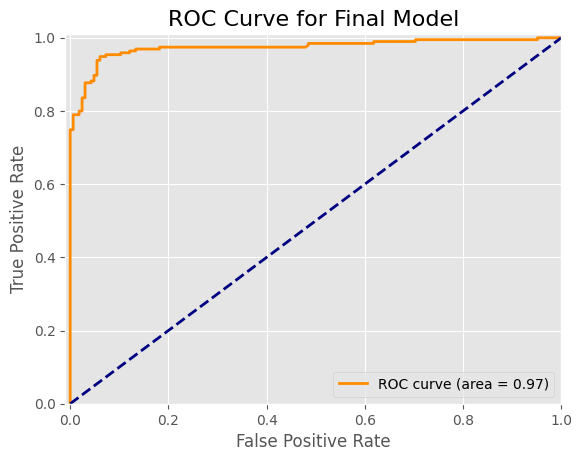

In [42]:
# Plot ROC AUC curve
y_pred_proba = final_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Final Model', fontsize=16)
plt.legend(loc="lower right")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.01)
plt.show()

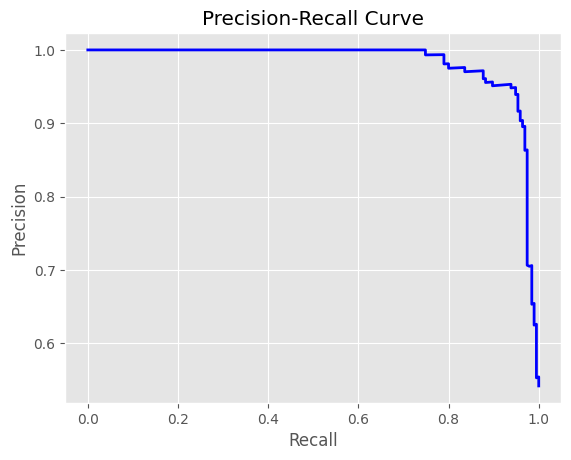

In [44]:
# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_test)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

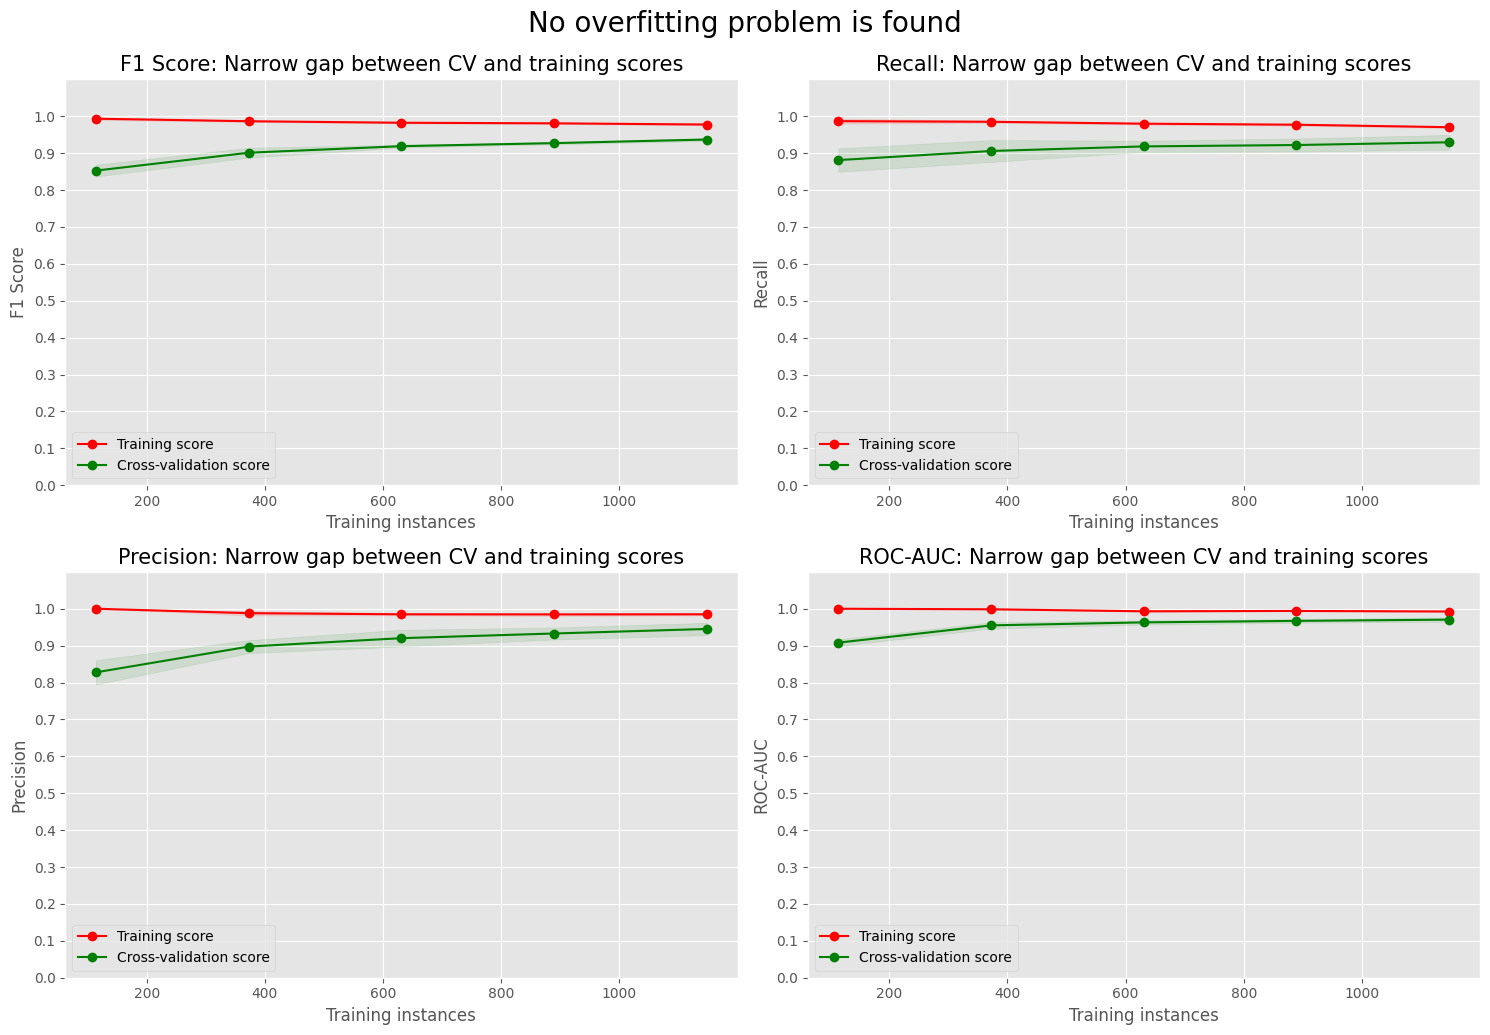

In [45]:
# Define the metrics
metrics = {
    'F1 Score': 'f1',
    'Recall': 'recall',
    'Precision': 'precision',
    'ROC-AUC': 'roc_auc'
}

# Initialize the figure and axis array
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()  # Flatten the 2D array of axes for easy iteration

# Loop through each metric
for i, (metric_name, metric) in enumerate(metrics.items()):
    train_sizes, train_scores, test_scores = learning_curve(
        final_model, X_train, y_train, cv=5, scoring=metric, n_jobs=-1)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    axes[i].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes[i].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes[i].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes[i].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    axes[i].set_xlabel('Training instances')
    axes[i].set_ylabel(metric_name)
    axes[i].set_title(f'{metric_name}: Narrow gap between CV and training scores', size=15)
    axes[i].legend(loc="best")
    axes[i].set_ylim(0, 1.1)
    axes[i].set_yticks(np.arange(0, 1.1, 0.1))

# Adjust layout
plt.tight_layout()
plt.suptitle('No overfitting problem is found', y=1.03, size=20)
plt.show()

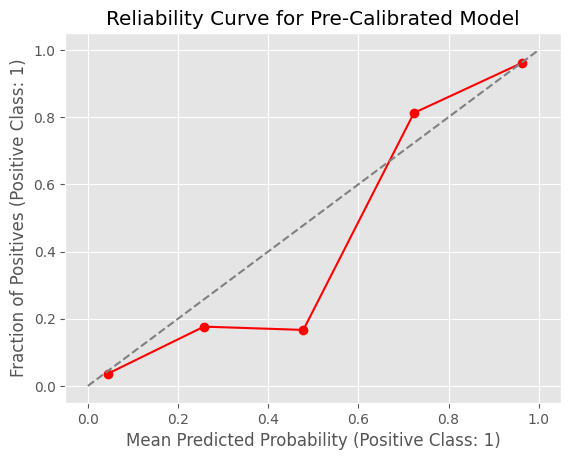

In [46]:
# Predict probabilities on the test set
y_pred_proba = final_model.predict_proba(X_test)[:, 1]

# Plot Reliability Curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=5)

plt.figure()
plt.plot(prob_pred, prob_true, marker='o', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Mean Predicted Probability (Positive Class: 1)')
plt.ylabel('Fraction of Positives (Positive Class: 1)')
plt.title('Reliability Curve for Pre-Calibrated Model')
plt.show()

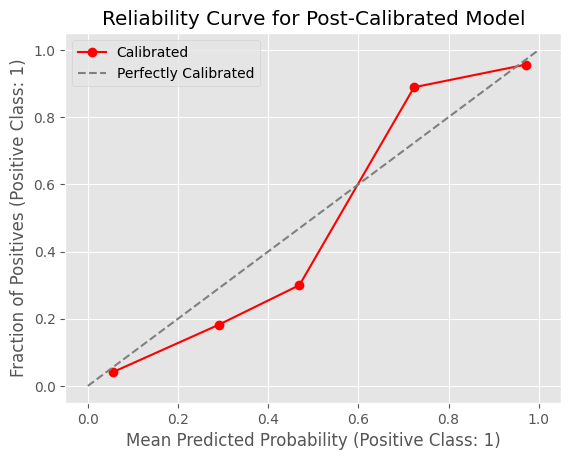

In [47]:
calibrated_clf = CalibratedClassifierCV(estimator=final_model, method='isotonic')
calibrated_clf.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = calibrated_clf.predict_proba(X_test)[:, 1]

# Compute calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=5)

# Plot the calibration curve
plt.figure()
plt.plot(prob_pred, prob_true, marker='o', color='red', label='Calibrated')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability (Positive Class: 1)')
plt.ylabel('Fraction of Positives (Positive Class: 1)')
plt.title('Reliability Curve for Post-Calibrated Model')
plt.legend(loc='best')
plt.show()


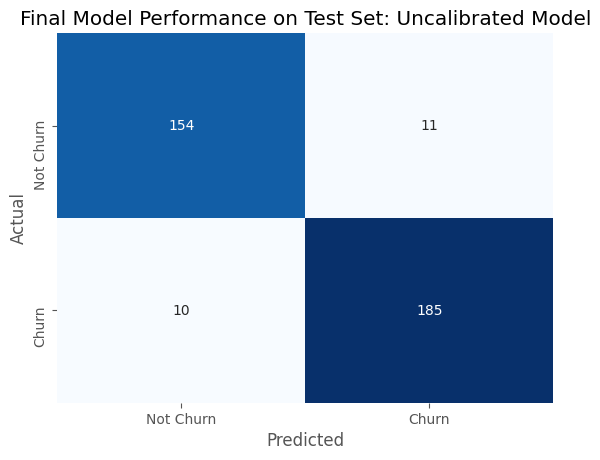

In [48]:
# predict on the test set
y_pred_test = final_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues', cbar=False)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Final Model Performance on Test Set: Uncalibrated Model')
ax.set_xticklabels(['Not Churn', 'Churn'])
ax.set_yticklabels(['Not Churn', 'Churn'])
plt.show()

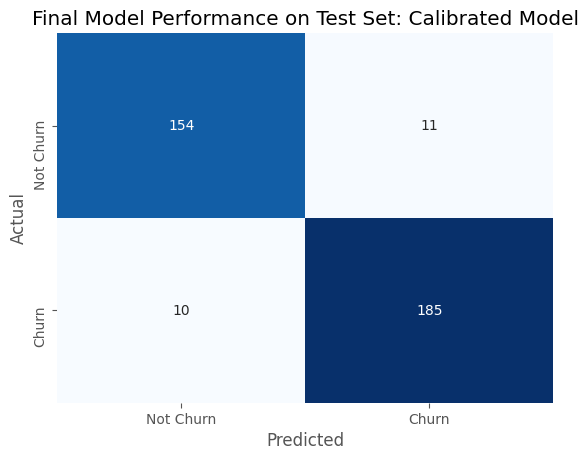

In [49]:
# predict on the test set
y_pred_test = calibrated_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues', cbar=False)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Final Model Performance on Test Set: Calibrated Model')
ax.set_xticklabels(['Not Churn', 'Churn'])
ax.set_yticklabels(['Not Churn', 'Churn'])
plt.show()

In [50]:
# Access the classifier and vectorizer from the pipeline
classifier = final_model.named_steps['classifier']
vectorizer = final_model.named_steps['preprocessor'].named_steps['vectorizer']

# Check if the classifier has coefficients (linear SVM)
if hasattr(classifier, 'coef_'):
    coefficients = classifier.coef_.toarray().flatten()  # Convert sparse matrix to dense array and flatten
    transformed_feature_names = vectorizer.get_feature_names_out()
    
    # Ensure that the coefficients and feature names match in length
    if len(coefficients) == len(transformed_feature_names):
        # Create a DataFrame with the feature importance
        feature_importance = pd.DataFrame({
            'Feature': transformed_feature_names,
            'Importance': coefficients
        })

        # Sort by absolute importance
        feature_importance['Absolute_Importance'] = feature_importance['Importance'].abs()
        feature_importance = feature_importance.sort_values(by='Absolute_Importance', ascending=False)

        # Drop 'Absolute_Importance'
        feature_importance.drop(columns=['Absolute_Importance'], inplace=True)

        # Display feature importance
        display(feature_importance.head(10))
    else:
        print("Error: The number of coefficients does not match the number of features.")
else:
    print("Error: The classifier does not have a `coef_` attribute.")

Feature  Importance
231      ah    -0.981006
1823     ti    -0.929204
629      em    -0.901181
1335     ni    -0.776838
1290     na    -0.653980
1249     mi    -0.639472
1709     sih   -0.625678
1138     la    -0.616912
380      atu   -0.615647
875      ia    -0.594742

In [51]:
# Filter out rows where the 'Feature' column has single-character strings
# Replace spaces with $ in the 'Feature' column
feature_importance2 = feature_importance.copy()
feature_importance2['Feature'] = feature_importance2['Feature'].str.replace(' ', '_')
feature_importance2 = feature_importance2.head(20)
feature_importance2 = feature_importance2.sort_values(by='Importance')
feature_importance2

Feature  Importance
231      ah_   -0.981006
1823     ti_   -0.929204
629      em_   -0.901181
1335     ni_   -0.776838
1290     na_   -0.653980
1249     mi_   -0.639472
1709     sih   -0.625678
1138     la_   -0.616912
380      atu   -0.615647
875      ia_   -0.594742
374      ati   -0.574031
307      ani   -0.485554
964      ini   -0.482558
1862     tun   -0.455873
1361     no_    0.479708
1851     tra    0.487642
313      ans    0.505239
1843     to_    0.573750
504      dan    0.584727
301      an_    0.589402

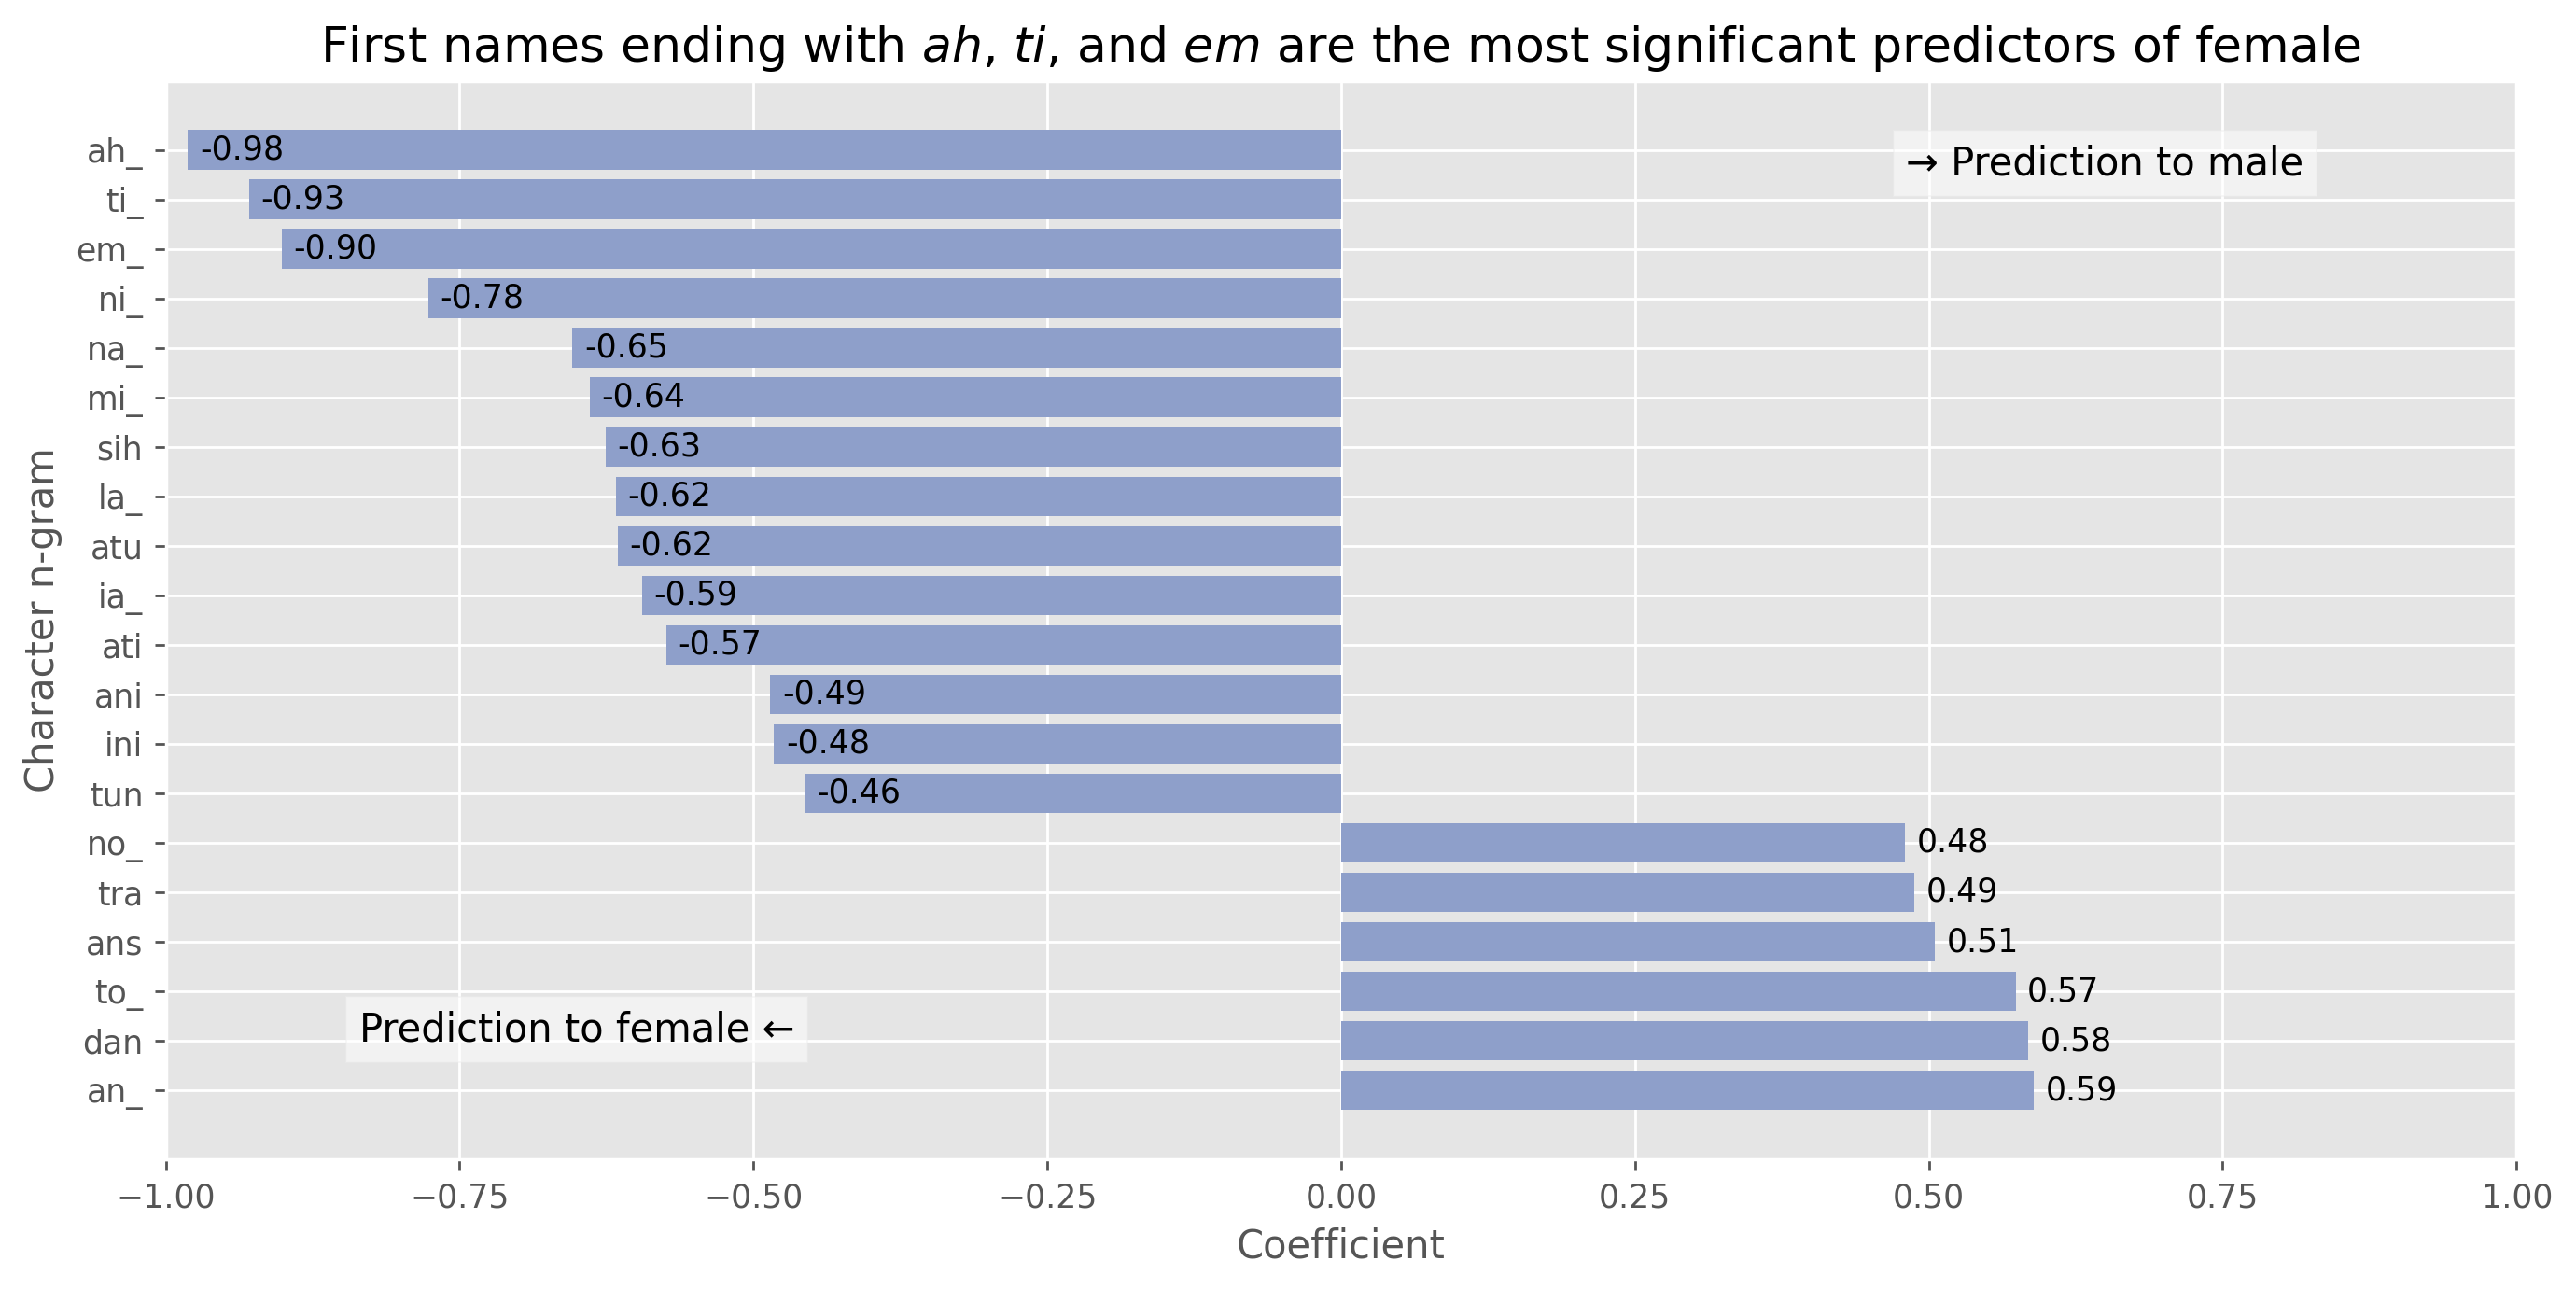

In [88]:
# visualize feature importance
plt.figure(figsize=(13, 6), dpi=250)
bars = plt.barh(feature_importance2['Feature'], feature_importance2['Importance'], color='#8e9fca')

# add data labels 
for bar in bars:
    plt.text(
        bar.get_width() + 0.01,                 # position slightly to the right of the bar end
        bar.get_y() + bar.get_height() / 2,     # vertical position at the center of the bar
        f'{bar.get_width():.2f}',               # format the coefficient value to 2 decimal places
        va='center',                            # vertical alignment
        ha='left',                              # horizontal alignment
        fontsize=10,                            
        color='black'                           
    )
plt.text(0.65, 0.5, '→ Prediction to male', 
         bbox=dict(facecolor='white', alpha=0.5), 
         fontsize=12, color='black', ha='center')
plt.text(-0.65, 18, 'Prediction to female ←',
         bbox=dict(facecolor='white', alpha=0.5), 
         fontsize=12, color='black', ha='center')

plt.xlabel('Coefficient')
plt.title(f'First names ending with $ah$, $ti$, and $em$ are the most significant predictors of female', size=15)
plt.ylabel('Character n-gram')
plt.gca().invert_yaxis()                       
plt.xlim(-1, 1)
plt.show()

In [53]:
df_seen = pd.DataFrame({'name':X_train, 'gender':y_train})
df_seen['gender'] = df_seen['gender'].apply(lambda x: 'm' if x == 1 else 'f')

In [54]:
df_seen[(df_seen['name'].str.contains(r'^\w+ah\s', regex=True)) & (df_seen['gender'] == 'f')]

name gender
598            indah kurnia sari      f
1731            diah ayu safitri      f
823               aisyah giovani      f
126              indah rahmawati      f
41               zakiah nurviani      f
94            indah permata sari      f
1835              afifah mariani      f
1687               indah mawarni      f
660   azzah rotun nisa almufidah      f
1001            indah bunga hati      f
1284               fadhilah aini      f
1782         hasnah elfina warda      f
1309               atiah azzaroh      f
758                endah susanti      f
1809           kamilah mubarokah      f
1560             indah fatmawati      f

In [55]:
df_seen[(df_seen['name'].str.contains(r'^\w+ah\s', regex=True)) & (df_seen['gender'] == 'm')]

name gender
1243          lamsyah purba      m
957   abdullah afif azzuhri      m
412     aissyah dwi zhaskia      m
125        hijrah syahputra      m
22       ibnuyohanzah ahmad      m

In [56]:
# Make predictions on the test set
y_pred = calibrated_clf.predict(X_test)

# Get the predicted probabilities for each class
y_prob = calibrated_clf.predict_proba(X_test)

# Combine the predictions and probabilities into a DataFrame
predictions_df = pd.DataFrame({
    'Name': X_test,
    'Actual': y_test,
    'Predicted': y_pred,
    'ProbM': y_prob[:, 1],  # Probability of 'Male'
    'ProbF': y_prob[:, 0],  # Probability of 'Female'
}).round(2)

predictions_df['FN'] = (predictions_df['Actual'] == 1) & (predictions_df['Predicted'] == 0)
predictions_df['FP'] = (predictions_df['Actual'] == 0) & (predictions_df['Predicted'] == 1)

predictions_df.head()

Name  Actual  Predicted  ProbM  ProbF     FN     FP
1351     wahyu redyansyah       1          1   0.71   0.29  False  False
221   yunaldi rizki putra       1          1   1.00   0.00  False  False
1653     thamrin simamora       1          1   1.00   0.00  False  False
441               samiyah       0          0   0.09   0.91  False  False
1386     suci ayu mawarni       0          0   0.02   0.98  False  False

In [57]:
predictions_df[(predictions_df['Name'].str.contains(r'^\w+ah\s', regex=True))]

Name  Actual  Predicted  ProbM  ProbF     FN     FP
468           hamzah maulana       1          0   0.31   0.69   True  False
1523    afiah rohadatul aisy       0          0   0.00   1.00  False  False
357     khasanah dwi fauziah       0          0   0.00   1.00  False  False
1019  azizah hanifatur rahma       0          0   0.05   0.95  False  False
958          afifah azzahroh       0          0   0.03   0.97  False  False
1832      rahmidiah ediyanti       0          0   0.00   1.00  False  False

In [58]:
from lime.lime_text import LimeTextExplainer

# Initialize LIME text explainer
explainer = LimeTextExplainer(class_names=['Female', 'Male'])

# Ensure text_instance is a single string
text_instance = predictions_df[(predictions_df['Name'].str.contains(r'^\w+ah\s', regex=True))].iloc[3, 0]
print(f'Gender to predict: {text_instance}')        

# Ensure the classifier function is correct
def predict_proba_fn(texts):
    return calibrated_clf.predict_proba(texts)

# Explain the instance
exp = explainer.explain_instance(text_instance, 
                                 predict_proba_fn, 
                                 num_features=50)

# Display the explanation
exp.show_in_notebook(text=True)

Gender to predict: azizah hanifatur rahma


In [59]:
from lime.lime_text import LimeTextExplainer

# Initialize LIME text explainer
explainer = LimeTextExplainer(class_names=['Female', 'Male'])

# Ensure text_instance is a single string
text_instance = predictions_df['Name'].iloc[77]
print(f'Gender to predict: {text_instance}')        

# Ensure the classifier function is correct
def predict_proba_fn(texts):
    return calibrated_clf.predict_proba(texts)

# Explain the instance
exp = explainer.explain_instance(text_instance, 
                                 predict_proba_fn, 
                                 num_features=50)

# Display the explanation
exp.show_in_notebook(text=True)

Gender to predict: muhammad azmy


In [60]:
mispredictions = predictions_df[predictions_df['Actual'] != predictions_df['Predicted']]
mispredictions_cnt = len(mispredictions)
misprediction_rate = len(mispredictions)/len(predictions_df)*100
type1_errors = mispredictions[mispredictions['FP'] == True]
type2_errors = mispredictions[mispredictions['FN'] == True]
print(f'Misprediction in total: {mispredictions_cnt} (or {misprediction_rate:.2f}%)')
print(f'Total false positives: {len(type1_errors)}')
print(f'Total false negatives: {len(type2_errors)}')
display(mispredictions.head())

Misprediction in total: 21 (or 5.83%)
Total false positives: 11
Total false negatives: 10


Name  Actual  Predicted  ProbM  ProbF     FN     FP
213   ridha ulva       0          1   0.93   0.07  False   True
1341       temen       0          1   0.84   0.16  False   True
369    air murya       0          1   0.90   0.10  False   True
300     sarminah       1          0   0.03   0.97   True  False
933   evi alisma       0          1   0.94   0.06  False   True

In [61]:
# discretize prediction score 1
mispredictions = mispredictions.copy()
bin = pd.cut(mispredictions['ProbM'], bins=4, labels=False)
mispredictions['Group'] = bin
bin_counts = mispredictions['Group'].value_counts().sort_index()
# see result
mispredictions.head()

Name  Actual  Predicted  ProbM  ProbF     FN     FP  Group
213   ridha ulva       0          1   0.93   0.07  False   True      3
1341       temen       0          1   0.84   0.16  False   True      3
369    air murya       0          1   0.90   0.10  False   True      3
300     sarminah       1          0   0.03   0.97   True  False      0
933   evi alisma       0          1   0.94   0.06  False   True      3

Group  FN  FP
0      0   6   0
1      1   3   0
2      2   1   2
3      3   0   9

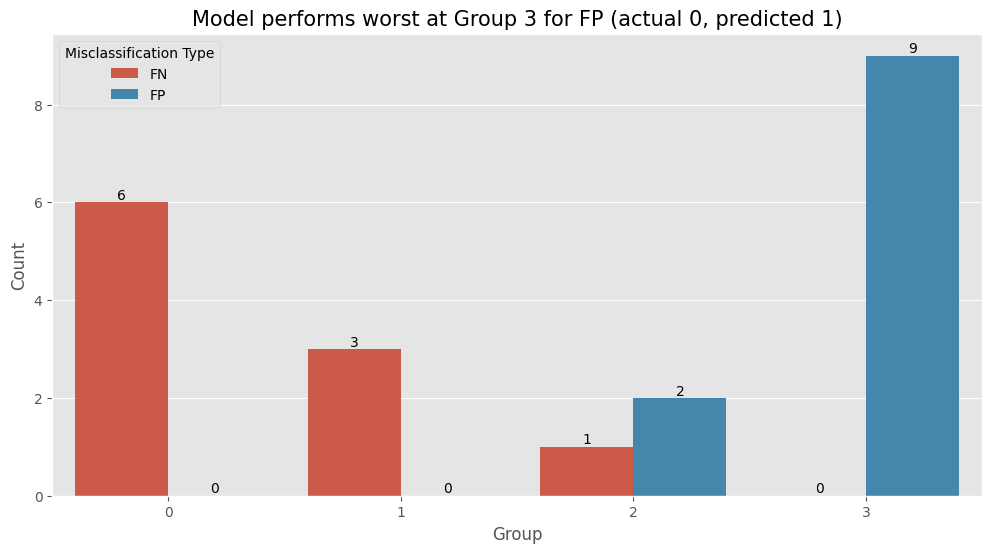

In [62]:
# calculate misclassifications

# group by 'Group' and count FNs and FPs
fn_fp_by_group = mispredictions.groupby('Group')[['FN', 'FP']].sum().reset_index()

display(fn_fp_by_group)

# plot the data
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Group', y='value', hue='variable', data=pd.melt(fn_fp_by_group, ['Group']))

# add labels on top
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 5),  
                textcoords='offset points',
                ha='center', va='center')

plt.title('Model performs worst at Group 3 for FP (actual 0, predicted 1)', fontsize=15)
plt.xlabel('Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Misclassification Type')
plt.show()

In [63]:
mispredictions.groupby('Group').agg(func={'ProbM':'mean'}).round(3)

ProbM
Group       
0      0.065
1      0.373
2      0.510
3      0.870